In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.io as sio
import seaborn as sns
import statsmodels.api as sm
import funcs as func
import matplotlib.pyplot as plt
import sys
import pdb
import glob
import pickle
from itertools import combinations
import dill
import scipy.stats as sp_st
from statannot import add_stat_annotation

import sys
sys.path.append('/home/jyotika/Utils/hddm/')

import hddm

data_dir = "./Data/processed_data/Y_maze/data_with_animal_ids/"
data_target_dir = "./Data/processed_data/Y_maze/data_with_animal_ids/for_b_cpp_calculation/"
data_target_dir2 = "./Data/processed_data/Y_maze/data_with_animal_ids/for_ddm_models/"
fig_target_dir = "./Figures/Y_maze/"

plt.rcParams["figure.facecolor"] = "w"


In [2]:
block_change_aligned_df = pd.read_csv(data_target_dir2+"block_change_aligned_df.csv")
compare_across_animals = pd.read_csv(data_target_dir2+"compare_across_animals.csv")

block_change_aligned_df_avg_corrected = pd.read_csv(data_target_dir2+"block_change_aligned_df_avg_corrected.csv")

In [199]:
compare_across_animals_wo10 = compare_across_animals.loc[compare_across_animals["subject"]!=10.0]

In [3]:
block_change_aligned_df["nuclei"] = [x.split('-')[0] for x in block_change_aligned_df["condition"]]
block_change_aligned_df["experiment_type"] = [x.split('-')[1] for x in block_change_aligned_df["condition"]]
block_change_aligned_df["experiment_type1"] = [ x if x.split('-')[1] == "Stim" else x.split('-')[1] for x in block_change_aligned_df["condition"]]
block_change_aligned_df["conflict + volatility"] = [x+"-"+y   for x,y in zip(block_change_aligned_df["conflict"], block_change_aligned_df["volatility"])]
block_change_aligned_df["response"] = (block_change_aligned_df["chosen_action"]==block_change_aligned_df["optimal"]).astype(int)

In [4]:
block_change_aligned_df["condition + bias"] = [x+" - "+y   for x,y in zip(block_change_aligned_df["condition"], block_change_aligned_df["block_change_type"])]

In [5]:
block_change_aligned_df["B_over_CPP"] = block_change_aligned_df["ideal_B"].values/block_change_aligned_df["cpp"].values
block_change_aligned_df["CPP_over_B"] = block_change_aligned_df["cpp"].values/block_change_aligned_df["ideal_B"].values

In [162]:
def calculate_avg(block_change_aligned_df,fields,y_var,dat_type="avg"):
    if dat_type == "avg":
        temp_mean_avg = pd.DataFrame(block_change_aligned_df.loc[(block_change_aligned_df["trials_from_change_point"]>2)&(block_change_aligned_df[fields[0]]!=10.0)].groupby(fields)[y_var].mean())
    elif dat_type == "cp":
        temp_mean_avg = pd.DataFrame(block_change_aligned_df.loc[(block_change_aligned_df["trials_from_change_point"]==0)&(block_change_aligned_df[fields[0]]!=10.0)].groupby(fields)[y_var].mean())
    elif dat_type == "none":
        temp_mean_avg = pd.DataFrame(block_change_aligned_df.loc[(block_change_aligned_df[fields[0]]!=10.0)].groupby(fields)[y_var].mean())
    return temp_mean_avg


def flatten_multiindex(temp_mean,fields):
    new_df = pd.DataFrame()
    level_indices = np.shape(temp_mean.index[0])[0]
    for i in np.arange(level_indices):
        new_df[fields[i]] = temp_mean.index.get_level_values(i)
    new_df[temp_mean.columns[0]] = temp_mean.values
    
    return new_df
        

def add_more_fields(df):
    df["nuclei"] = [ x.split('-')[0]  for x in df["condition"]]
    df["conflict + volatility"] = [x+"-"+y   for x,y in zip(df["conflict"], df["volatility"])]
    return df



In [189]:
temp_mean_avg_b = calculate_avg(block_change_aligned_df,["animal_id","conflict","volatility","condition","session"],"ideal_B","avg")
temp_mean_cp_b = calculate_avg(block_change_aligned_df,["animal_id","conflict","volatility","condition","session"],"ideal_B","cp")
temp_mean_avg_cpp = calculate_avg(block_change_aligned_df,["animal_id","conflict","volatility","condition","session"],"cpp","avg")
temp_mean_cp_cpp = calculate_avg(block_change_aligned_df,["animal_id","conflict","volatility","condition","session"],"cpp","cp")

temp_mean_avg_rt = calculate_avg(block_change_aligned_df,["animal_id","conflict","volatility","condition","session"],"rt","avg")
temp_mean_cp_rt = calculate_avg(block_change_aligned_df,["animal_id","conflict","volatility","condition","session"],"rt","cp")

In [179]:
temp_mean_evol_rt = calculate_avg(block_change_aligned_df,["animal_id","conflict","volatility","condition","trials_from_change_point"],"rt","none")


In [165]:
temp_mean_avg_rt_err = calculate_avg(block_change_aligned_df,["animal_id","conflict","volatility","condition","session","response"],"rt","avg")
temp_mean_cp_rt_err = calculate_avg(block_change_aligned_df,["animal_id","conflict","volatility","condition","session","response"],"rt","cp")

In [166]:
temp_mean_avg_perf = calculate_avg(block_change_aligned_df,["animal_id","conflict","volatility","condition","session"],"response","avg")
temp_mean_cp_perf = calculate_avg(block_change_aligned_df,["animal_id","conflict","volatility","condition","session"],"response","cp")

In [167]:
dat["avg_perf"] = temp_mean_avg_v = calculate_avg(compare_across_animals,["subject","conflict","volatility","condition","session"],"v_est_jittered","avg")
temp_mean_avg_a = calculate_avg(compare_across_animals,["subject","conflict","volatility","condition","session"],"a_est_jittered","avg")
temp_mean_cp_v = calculate_avg(compare_across_animals,["subject","conflict","volatility","condition","session"],"v_est_jittered","cp")
temp_mean_cp_a = calculate_avg(compare_across_animals,["subject","conflict","volatility","condition","session"],"a_est_jittered","cp")

In [190]:
mean_animal_avg_b = add_more_fields(flatten_multiindex(temp_mean_avg_b,["animal_id","conflict","volatility","condition","session"]))
mean_animal_cp_b = add_more_fields(flatten_multiindex(temp_mean_cp_b,["animal_id","conflict","volatility","condition","session"]))
mean_animal_avg_cpp = add_more_fields(flatten_multiindex(temp_mean_avg_cpp,["animal_id","conflict","volatility","condition","session"]))
mean_animal_cp_cpp = add_more_fields(flatten_multiindex(temp_mean_cp_cpp,["animal_id","conflict","volatility","condition","session"]))

mean_animal_avg_rt = add_more_fields(flatten_multiindex(temp_mean_avg_rt,["animal_id","conflict","volatility","condition","session"]))
mean_animal_cp_rt = add_more_fields(flatten_multiindex(temp_mean_cp_rt,["animal_id","conflict","volatility","condition","session"]))

mean_animal_avg_rt_err = add_more_fields(flatten_multiindex(temp_mean_avg_rt_err,["animal_id","conflict","volatility","condition","session","response"]))
mean_animal_cp_rt_err = add_more_fields(flatten_multiindex(temp_mean_cp_rt_err,["animal_id","conflict","volatility","condition","session","response"]))



In [180]:
mean_animal_evol_rt = add_more_fields(flatten_multiindex(temp_mean_evol_rt,["animal_id","conflict","volatility","condition","trials_from_change_point"]))

In [43]:
mean_animal_avg_perf = add_more_fields(flatten_multiindex(temp_mean_avg_perf,["animal_id","conflict","volatility","condition","session"]))
mean_animal_cp_perf = add_more_fields(flatten_multiindex(temp_mean_cp_perf,["animal_id","conflict","volatility","condition","session"]))


In [77]:
mean_animal_avg_v = add_more_fields(flatten_multiindex(temp_mean_avg_v,["subject","conflict","volatility","condition","session"]))
mean_animal_avg_a = add_more_fields(flatten_multiindex(temp_mean_avg_a,["subject","conflict","volatility","condition","session"]))

mean_animal_cp_v = add_more_fields(flatten_multiindex(temp_mean_cp_v,["subject","conflict","volatility","condition","session"]))
mean_animal_cp_a = add_more_fields(flatten_multiindex(temp_mean_cp_a,["subject","conflict","volatility","condition","session"]))


In [191]:

def pointplots(y_var,mean_animal,dat_type="avg"):
    
       
    for nuc in ["dSPN","iSPN"]:
        dat = mean_animal.loc[mean_animal["nuclei"]==nuc]
        x_unique = ["No","Low","High"]
        combs_conf = list(combinations(x_unique,2))
        combs_vol = list(combinations(["Low","High"],2))
        print(combs_conf)
        print(combs_vol)
        g1 = sns.catplot(x="conflict",y=y_var,hue="animal_id",data=dat,col='condition',kind='point',marker='o',linestyle='', palette='magma_r',markersize=5,dodge=True,order=["No","Low","High"])
        for ax in g1.axes[0]:
            plt.setp(ax.collections, alpha=.5) #for the markers
            plt.setp(ax.lines, alpha=.1)    #for the lines
            cond = ax.get_title().split(' = ')[1]
            datsp = dat.loc[dat["condition"]==cond]
            sns.pointplot(x="conflict",y=y_var,data=datsp,color='teal',ax=ax,marker='o',scale = 1.5,order=["No","Low","High"])
            add_stat_annotation(ax, data=datsp, x="conflict", y=y_var, 
                                   box_pairs=combs_conf,
                        
                                   test='t-test_ind', text_format='star', order=["No","Low","High"],
                                   loc='inside', verbose=2)

        g1.savefig(fig_target_dir+"average_over_animals_"+y_var+"_"+dat_type+"_"+nuc+"_conflict.png")

        g1 = sns.catplot(x="volatility",y=y_var,hue="animal_id",data=dat,col='condition',kind='point',marker='o',linestyle='', palette='magma_r',markersize=5,dodge=True,order=["Low","High"])
        for ax in g1.axes[0]:
            plt.setp(ax.collections, alpha=.5) #for the markers
            plt.setp(ax.lines, alpha=.1)    #for the lines
            cond = ax.get_title().split(' = ')[1]
            datsp = dat.loc[dat["condition"]==cond]

            sns.pointplot(x="volatility",y=y_var,data=datsp,color='teal',ax=ax,marker='o',scale = 1.5,order=["Low","High"])
            add_stat_annotation(ax, data=datsp, x="volatility", y=y_var, 
                                   box_pairs=combs_vol,order=["Low","High"],
                        
                                   test='t-test_ind', text_format='star',
                                   loc='inside', verbose=2)
            

        g1.savefig(fig_target_dir+"average_over_animals_"+y_var+"_"+dat_type+"_"+nuc+"_volatility.png")   

In [192]:


def justplot(x_var,y_var,mean_animal,col_order,dat_type="avg",col="conflict + volatility",hue="animal_id",sharey=True):
    x_unique = np.unique(mean_animal[x_var])
    print(x_unique)
    combs = list(combinations(x_unique,2))
    print(combs)
    g1 = sns.catplot(x=x_var,y=y_var,hue=hue,data=mean_animal,col=col,kind='point',marker='o',linestyle='', palette='magma_r',markersize=5,dodge=True,col_wrap=2,col_order=col_order,sharey=sharey,order=x_unique)
    for ax in g1.axes:
        plt.setp(ax.collections, alpha=.5) #for the markers
        plt.setp(ax.lines, alpha=.1)    #for the lines
        conf,vol = ax.get_title().split(' = ')[1].split('-')[0],ax.get_title().split(' = ')[1].split('-')[1]
        print(conf,vol)
        datsp = mean_animal.loc[(mean_animal["conflict"]==conf)&(mean_animal["volatility"]==vol)]
        sns.pointplot(x=x_var,y=y_var,data=datsp,color='teal',ax=ax,marker='o',scale = 1.5,order=x_unique)

        add_stat_annotation(ax, data=datsp, x=x_var, y=y_var, 
                               box_pairs=combs,order=x_unique,

                               test='t-test_ind', text_format='star',
                               loc='inside', verbose=2)

    return g1


def pointplots_full(x_var,y_var,mean_animal,dat_type="avg",col="conflict + volatility",hue="animal_id",sharey=True):
    

    for nuc in ["dSPN","iSPN"]:
        dat = mean_animal.loc[mean_animal["nuclei"]==nuc]
        g1 = justplot(x_var,y_var,dat,col_order,dat_type,col,hue,sharey)

        g1.savefig(fig_target_dir+"average_over_animals_"+x_var+"_"+y_var+"_"+dat_type+"_"+nuc+"_full_conflict.png")

#         g1 = sns.catplot(x="volatility",y=y_var,hue="animal_id",data=dat,col='condition',kind='point',marker='o',linestyle='', palette='magma_r',markersize=5,dodge=True,order=["Low","High"])
#         for ax in g1.axes[0]:
#             plt.setp(ax.collections, alpha=.5) #for the markers
#             plt.setp(ax.lines, alpha=.1)    #for the lines
#             cond = ax.get_title().split(' = ')[1]
#             datsp = dat.loc[dat["condition"]==cond]

#             sns.pointplot(x="volatility",y=y_var,data=datsp,color='teal',ax=ax,marker='o',scale = 1.5,order=["Low","High"])

#         g1.savefig(fig_target_dir+"average_over_animals_"+y_var+"_"+dat_type+"_"+nuc+"_volatility.png")   

[('No', 'Low'), ('No', 'High'), ('Low', 'High')]
[('Low', 'High')]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Low: t-test independent samples with Bonferroni correction, P_val=3.342e-16 stat=1.052e+01
Low v.s. High: t-test independent samples with Bonferroni correction, P_val=4.952e-34 stat=2.132e+01
No v.s. High: t-test independent samples with Bonferroni correction, P_val=1.412e-51 stat=3.797e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Low: t-test independent samples with Bonferroni correction, P_val=1.635e-14 stat=1.066e+01
Low v.s. High: t-test independent samples with Bonferroni correction, P_val=3.366e-27 stat=2.022e+01
No v.s. High: t-test independent samples with Bonferroni correction, P_val=9.716e-39 stat=3.175e+01
p-val

No v.s. High: t-test independent samples with Bonferroni correction, P_val=1.178e-26 stat=-1.754e+01
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Low v.s. High: t-test independent samples with Bonferroni correction, P_val=9.917e-01 stat=-1.037e-02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Low v.s. High: t-test independent samples with Bonferroni correction, P_val=3.261e-01 stat=9.864e-01
[('No', 'Low'), ('No', 'High'), ('Low', 'High')]
[('Low', 'High')]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Low: t-test independent samples with Bonferroni correction, P_val=9.127e-14 stat=9.259e+00
Low v.s. High: t-test independent samp

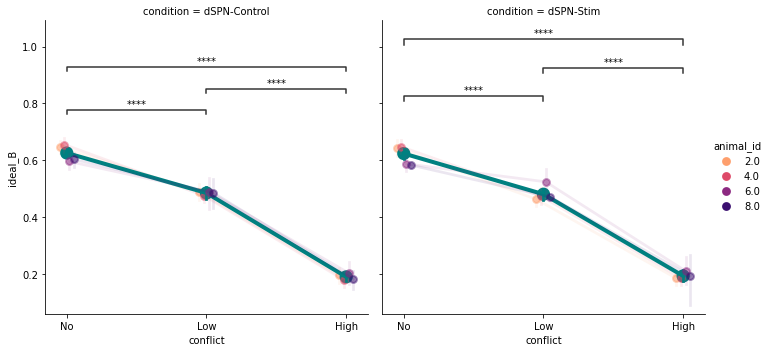

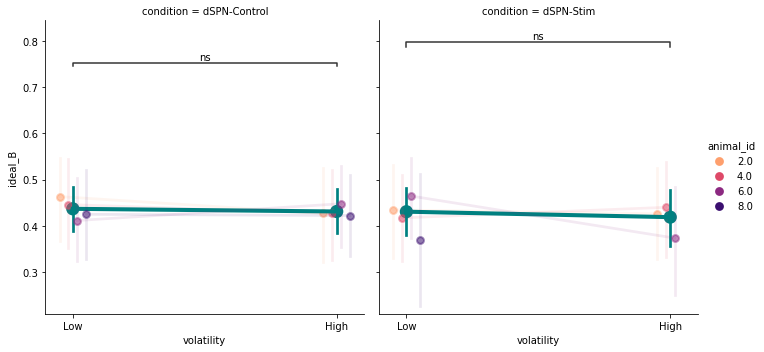

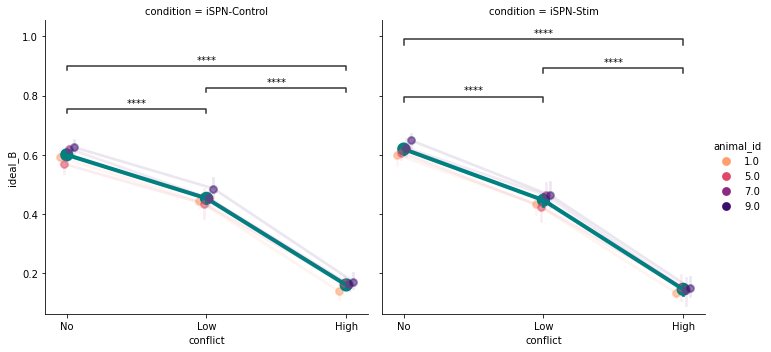

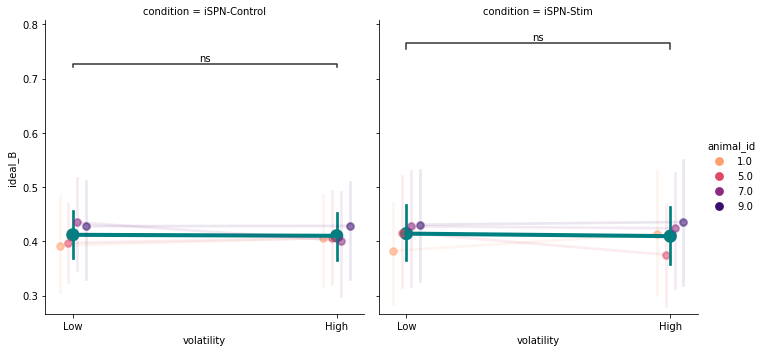

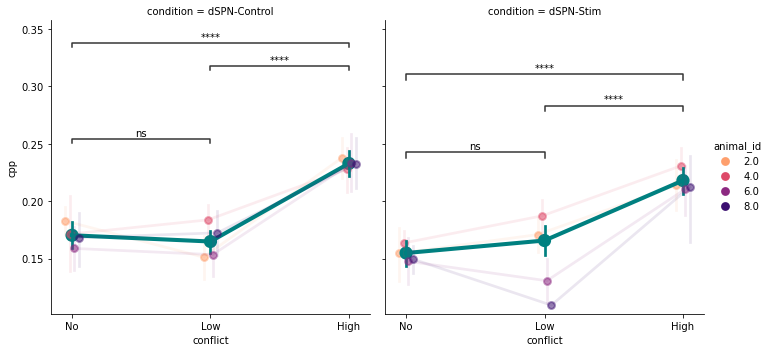

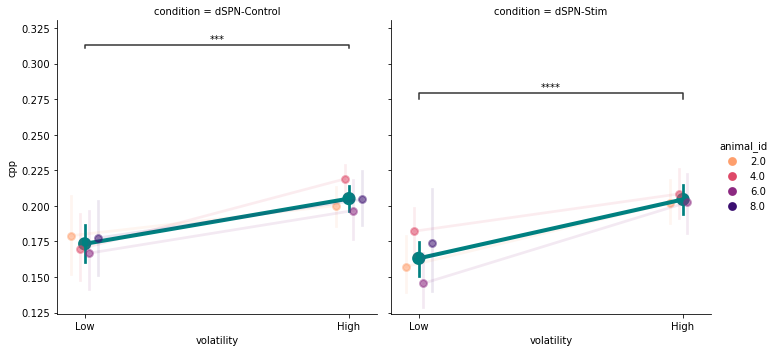

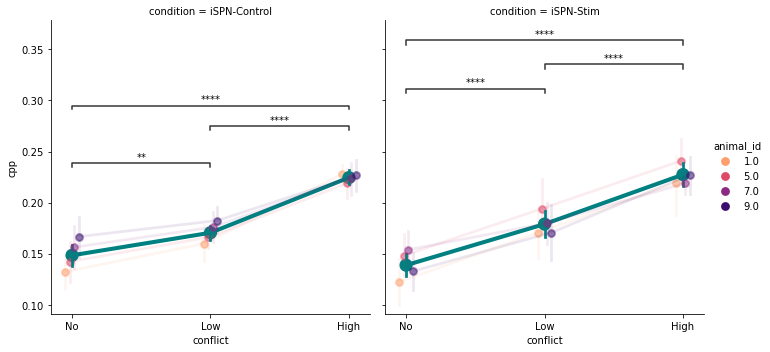

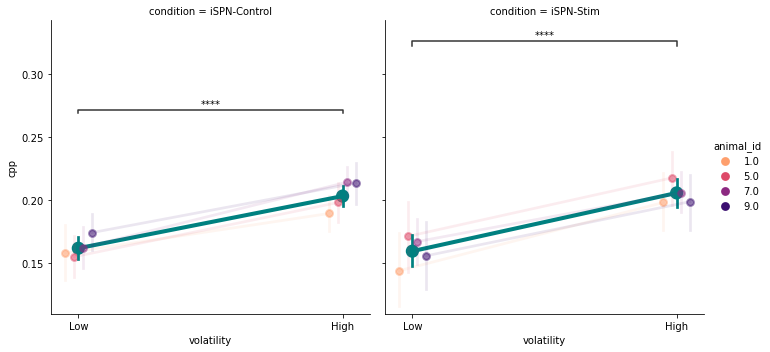

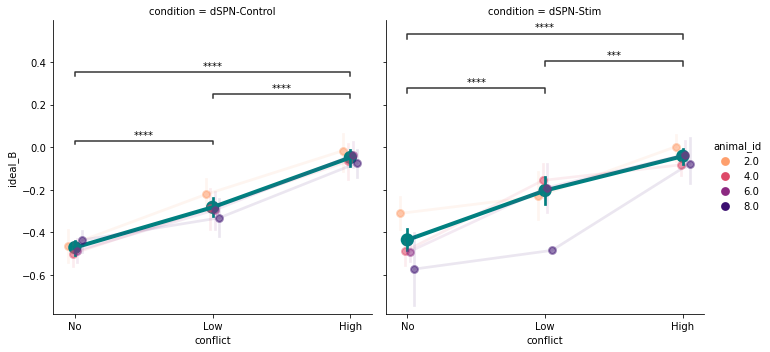

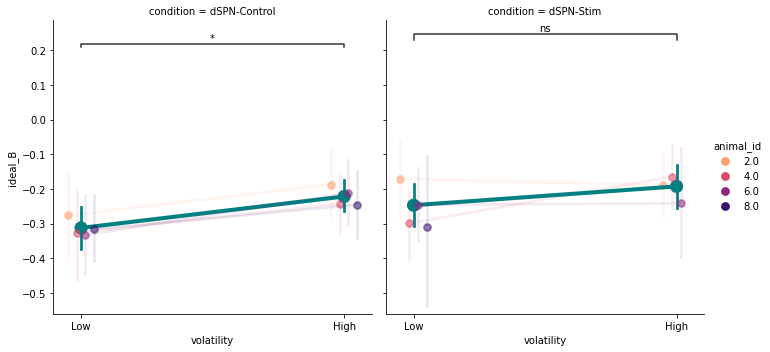

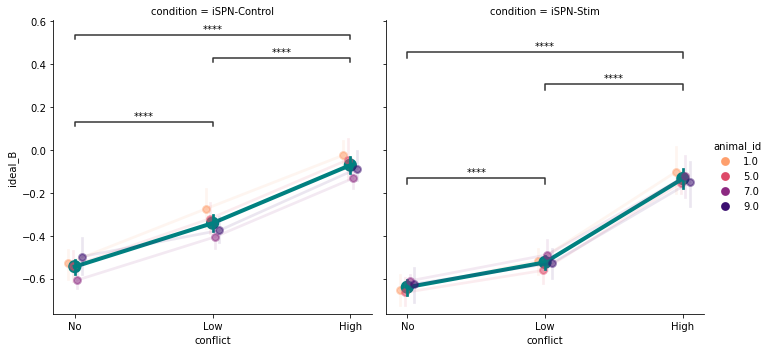

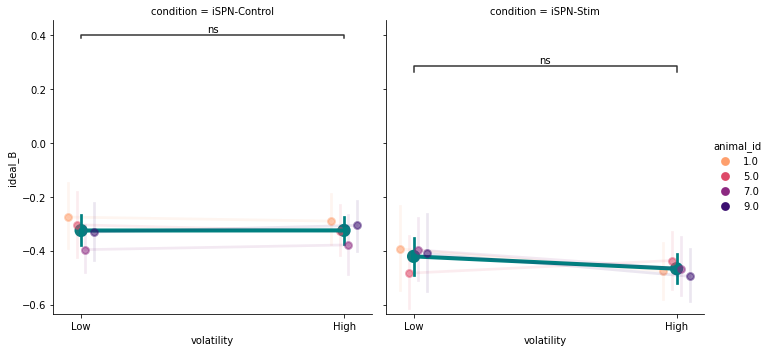

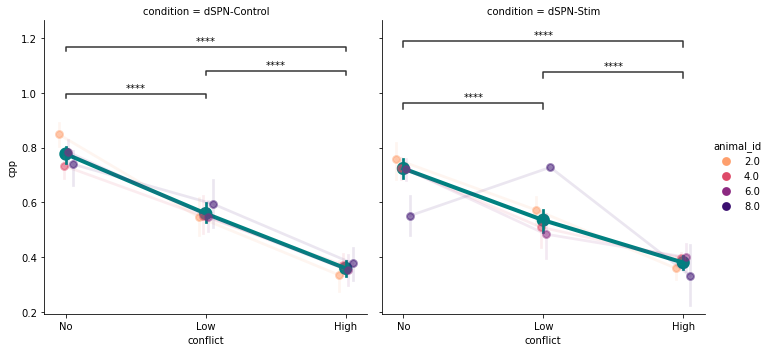

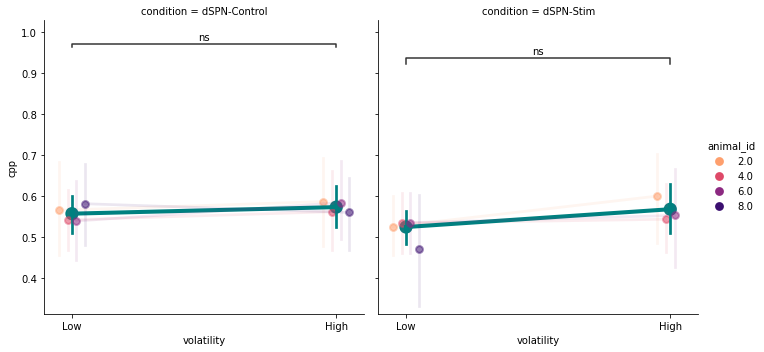

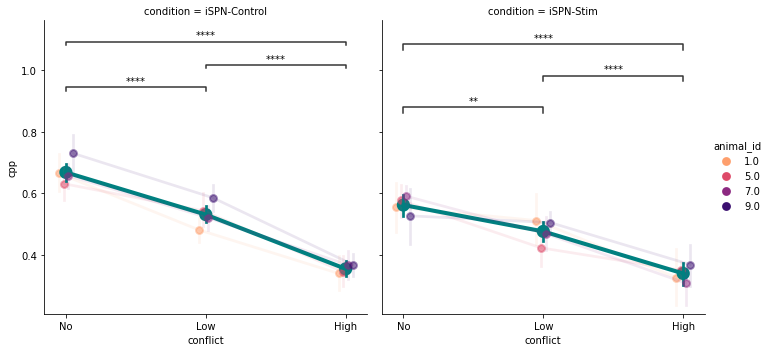

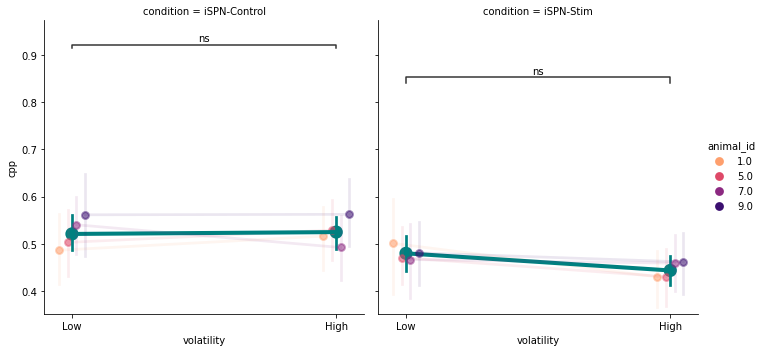

In [139]:
pointplots("ideal_B",mean_animal_avg_b,"avg")
pointplots("cpp",mean_animal_avg_cpp,"avg")
pointplots("ideal_B",mean_animal_cp_b,"cp")
pointplots("cpp",mean_animal_cp_cpp,"cp")

[('No', 'Low'), ('No', 'High'), ('Low', 'High')]
[('Low', 'High')]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Low: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=1.095e-01
Low v.s. High: t-test independent samples with Bonferroni correction, P_val=1.517e-08 stat=6.563e+00
No v.s. High: t-test independent samples with Bonferroni correction, P_val=1.759e-08 stat=6.539e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Low: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=3.671e-01
Low v.s. High: t-test independent samples with Bonferroni correction, P_val=1.242e-06 stat=5.718e+00
No v.s. High: t-test independent samples with Bonferroni correction, P_val=5.427e-06 stat=5.291e+00
p-val

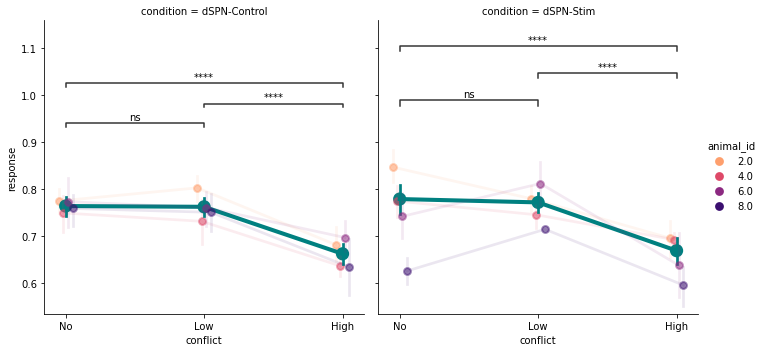

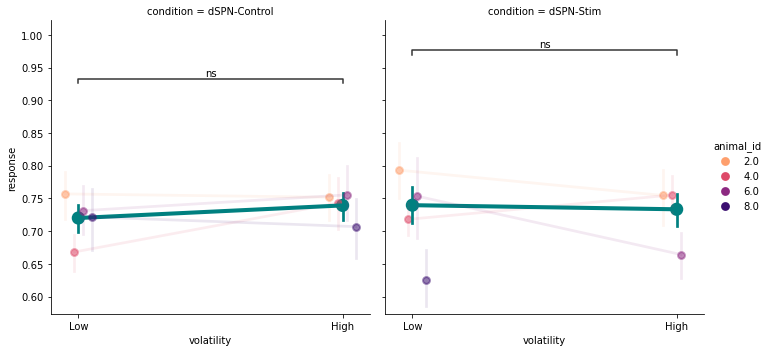

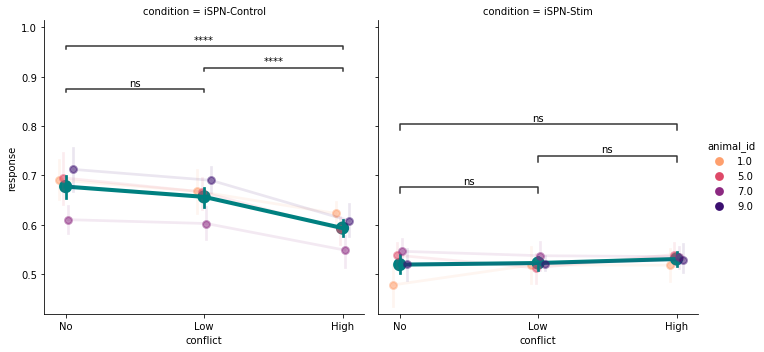

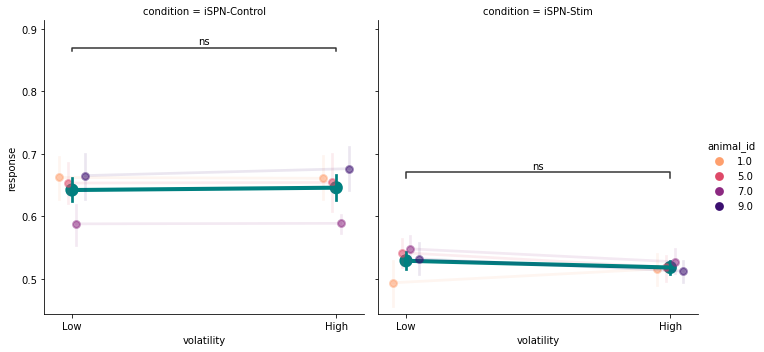

In [112]:
pointplots("response",mean_animal_avg_perf,"avg")

[('No', 'Low'), ('No', 'High'), ('Low', 'High')]
[('Low', 'High')]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Low: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-8.843e-01
Low v.s. High: t-test independent samples with Bonferroni correction, P_val=3.504e-02 stat=2.582e+00
No v.s. High: t-test independent samples with Bonferroni correction, P_val=1.791e-01 stat=1.911e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

No v.s. Low: t-test independent samples with Bonferroni correction, P_val=4.240e-01 stat=1.492e+00
Low v.s. High: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=2.038e-01
No v.s. High: t-test independent samples with Bonferroni correction, P_val=2.441e-01 stat=1.773e+00
p-va

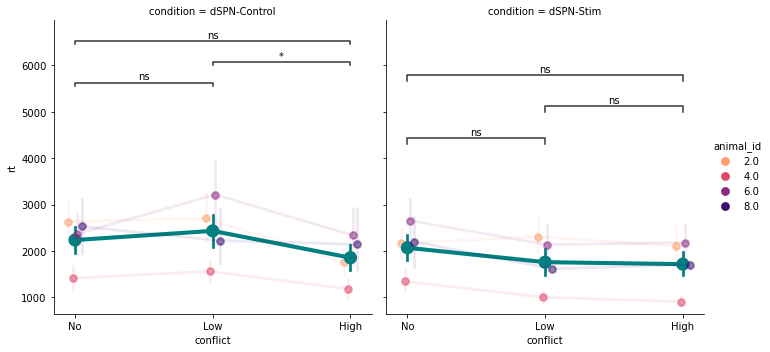

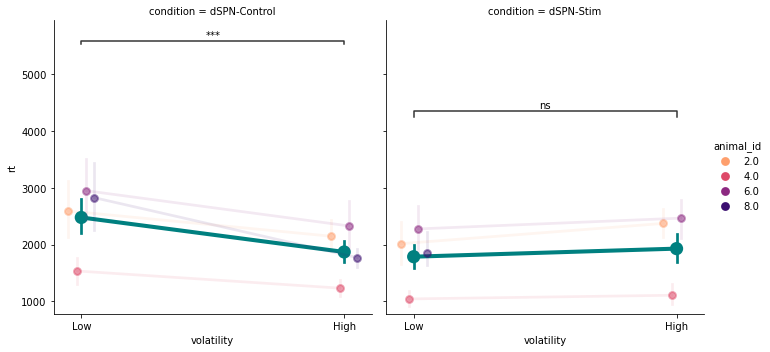

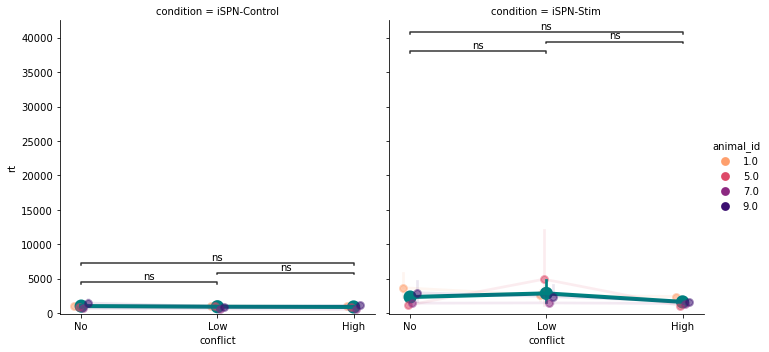

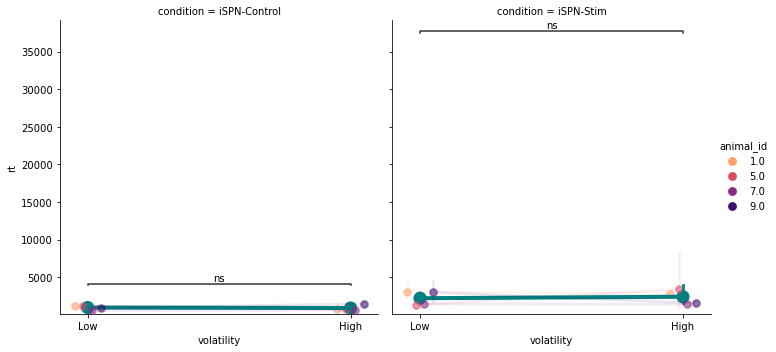

In [193]:
pointplots("rt",mean_animal_avg_rt,"avg")

[('dSPN-Control', 'dSPN-Stim')]
No Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=7.141e-01 stat=3.693e-01
No High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=8.429e-01 stat=-1.999e-01
Low Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=9.055e-01 stat=-1.196e-01
Low High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 

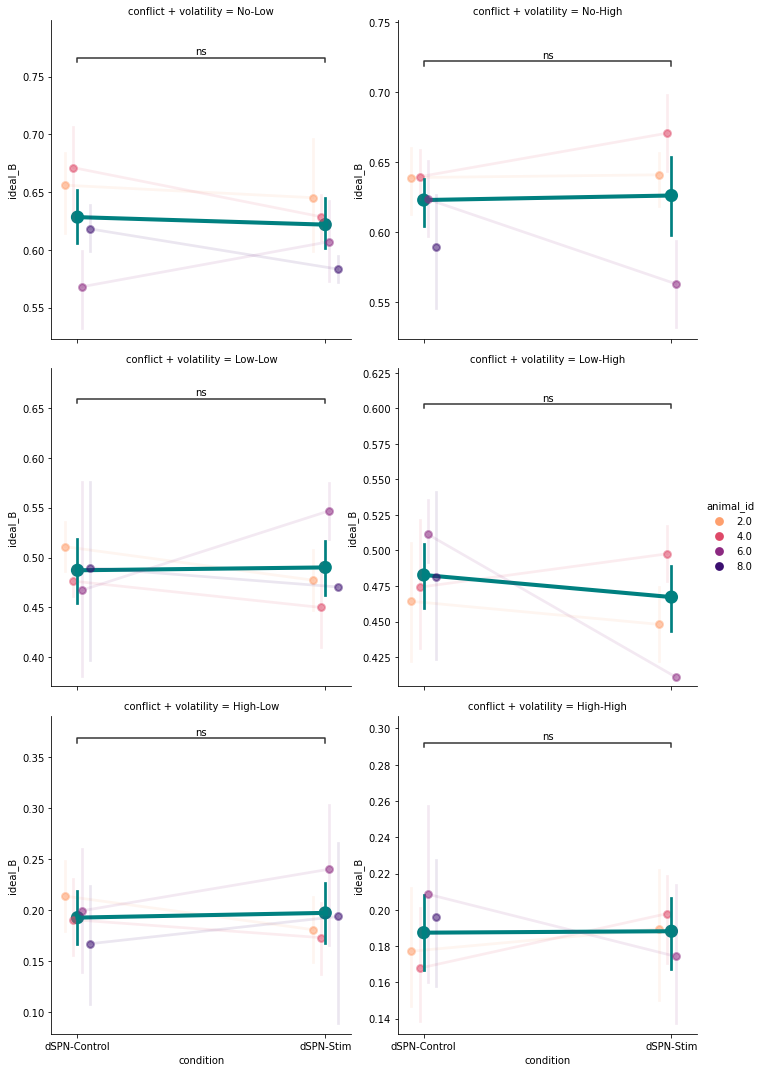

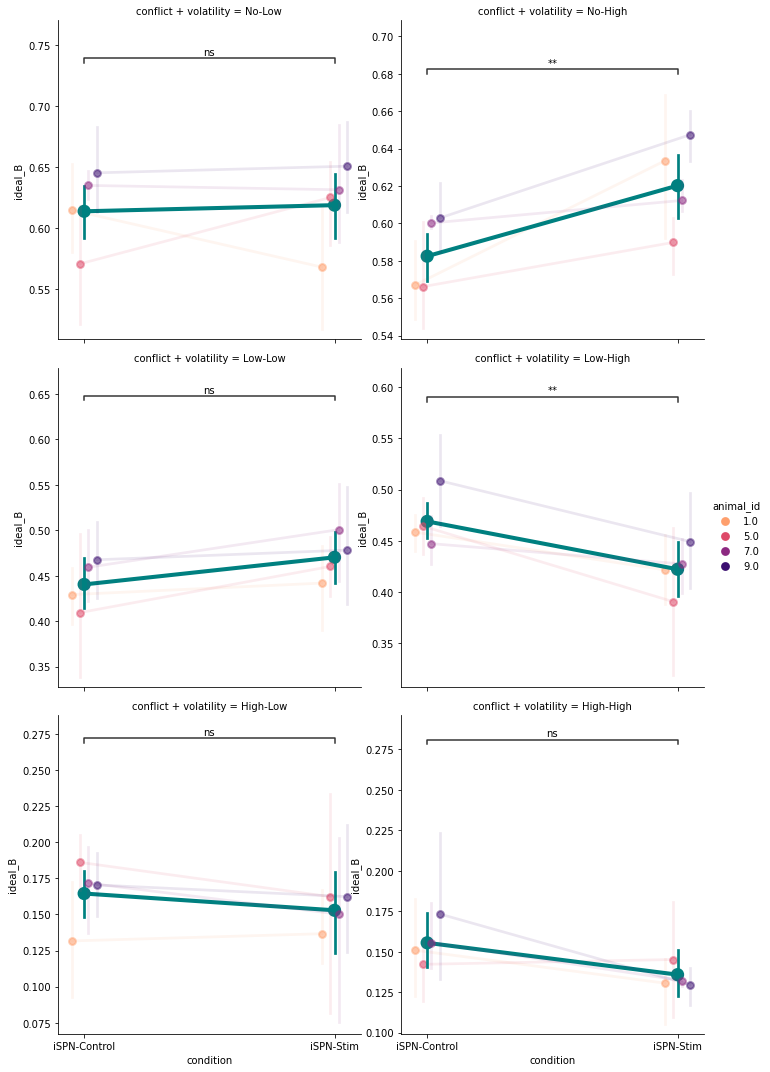

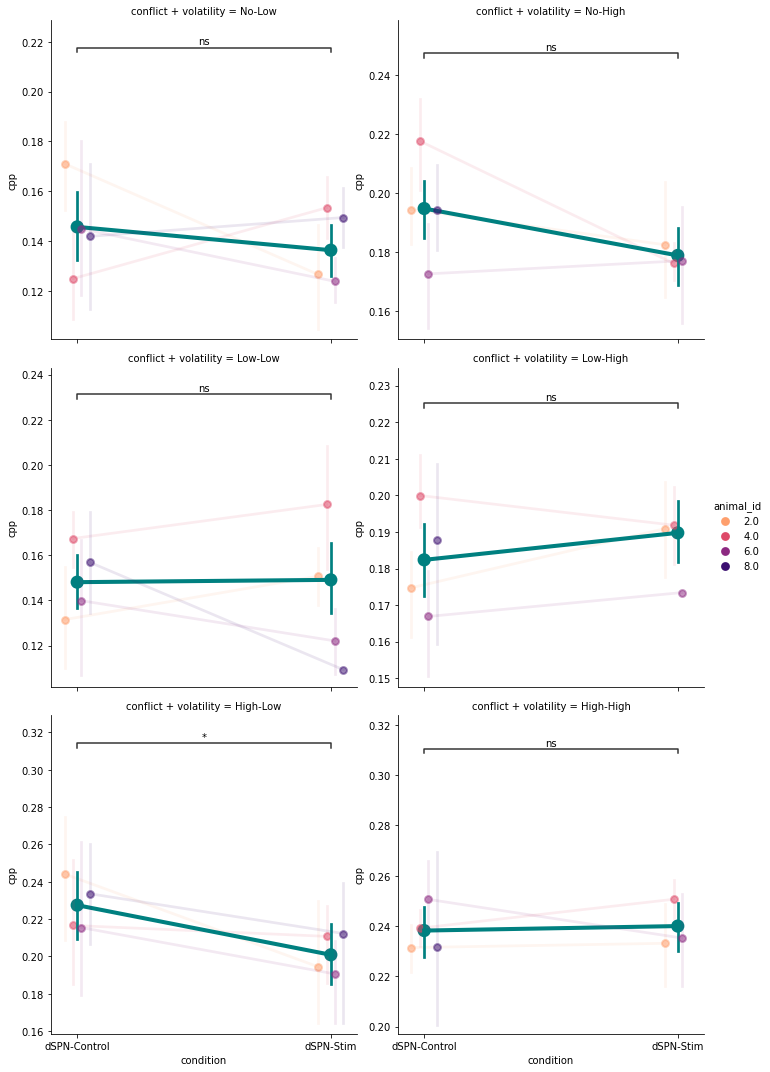

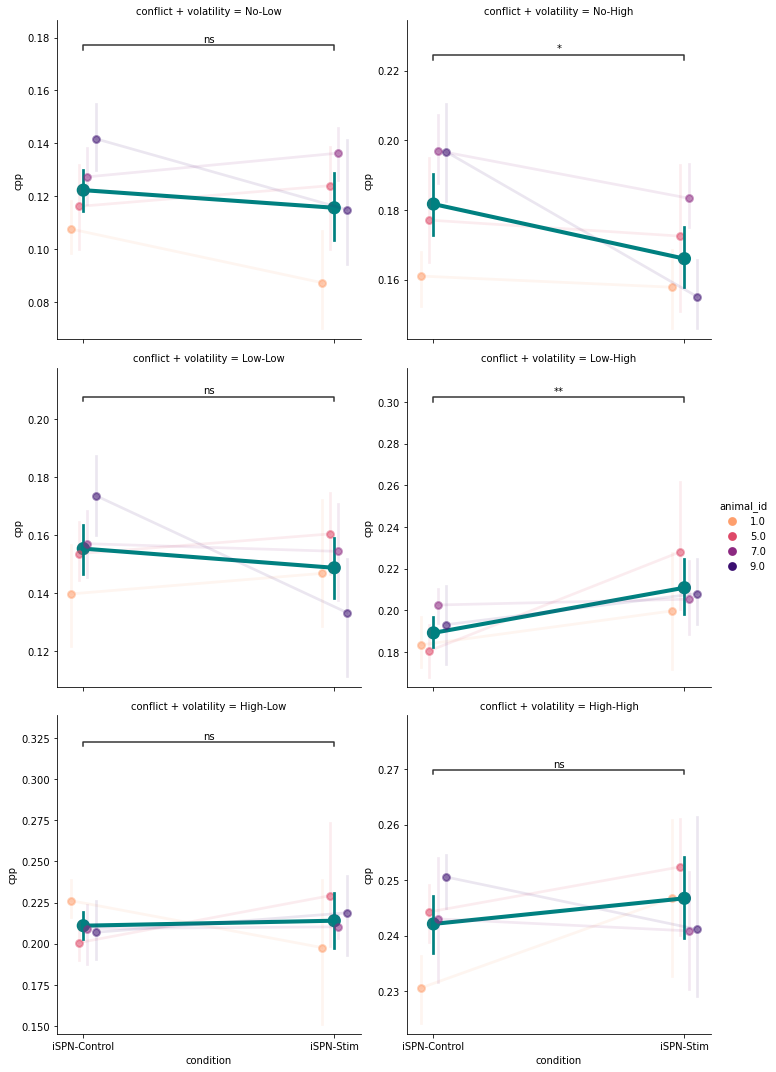

In [156]:
pointplots_full("condition","ideal_B",mean_animal_avg_b,"avg","conflict + volatility","animal_id",False)
pointplots_full("condition","cpp",mean_animal_avg_cpp,"avg","conflict + volatility","animal_id",False)


In [140]:
pointplots_full("condition","ideal_B",mean_animal_cp_b,"cp","conflict + volatility","animal_id",False)
pointplots_full("condition","cpp",mean_animal_cp_cpp,"cp","conflict + volatility","animal_id",False)

NameError: name 'dat' is not defined

['dSPN-Control' 'iSPN-Control']
[('dSPN-Control', 'iSPN-Control')]
No Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. iSPN-Control: t-test independent samples with Bonferroni correction, P_val=2.670e-10 stat=8.030e+00
No High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. iSPN-Control: t-test independent samples with Bonferroni correction, P_val=5.730e-04 stat=3.742e+00
Low Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. iSPN-Control: t-test independent samples with Bonferroni correction, P_val=9.249e-09 stat=6.996e+00
Low High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00

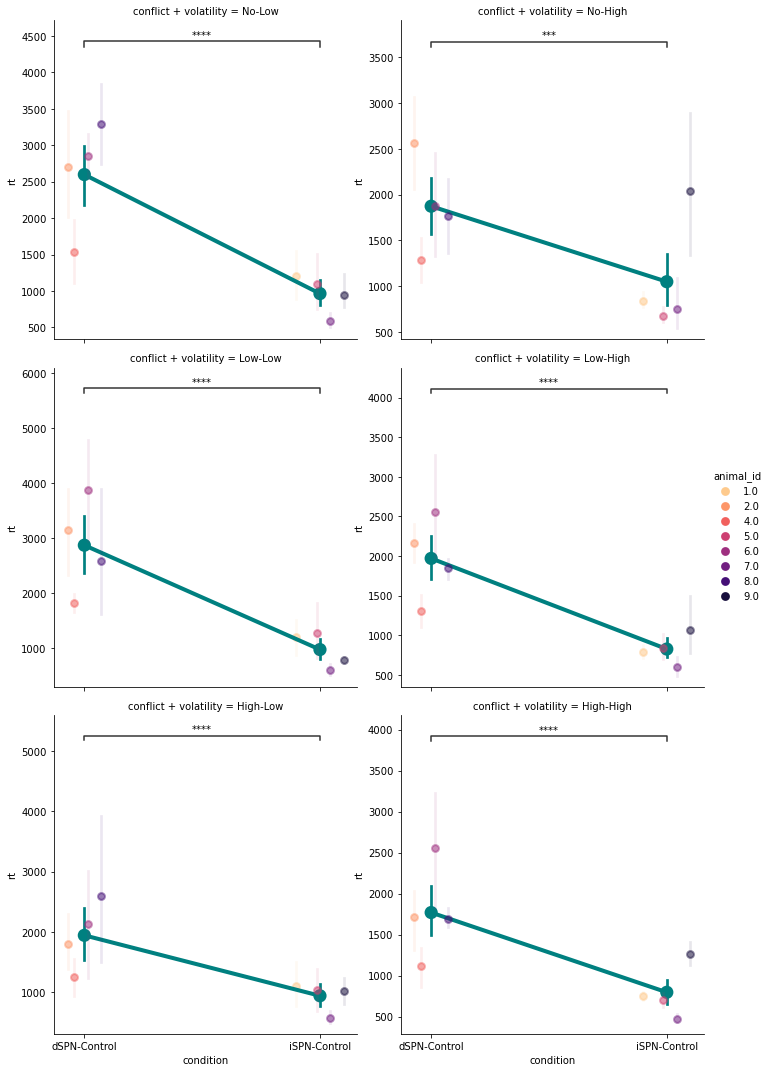

In [206]:
g1 = justplot("condition","rt",mean_animal_avg_rt.loc[(mean_animal_avg_rt["condition"].str.contains("Control"))],col_order,"avg","conflict + volatility","animal_id",False)
g1.savefig(fig_target_dir+"rt_comparison_dSPN_iSPN_controls.png")

In [204]:
col_order

['No-Low', 'No-High', 'Low-Low', 'Low-High', 'High-Low', 'High-High']

['dSPN-Control' 'iSPN-Control']
[('dSPN-Control', 'iSPN-Control')]
No Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. iSPN-Control: t-test independent samples with Bonferroni correction, P_val=5.889e-05 stat=4.424e+00
No High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. iSPN-Control: t-test independent samples with Bonferroni correction, P_val=2.293e-03 stat=3.258e+00
Low Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. iSPN-Control: t-test independent samples with Bonferroni correction, P_val=3.953e-08 stat=6.576e+00
Low High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00

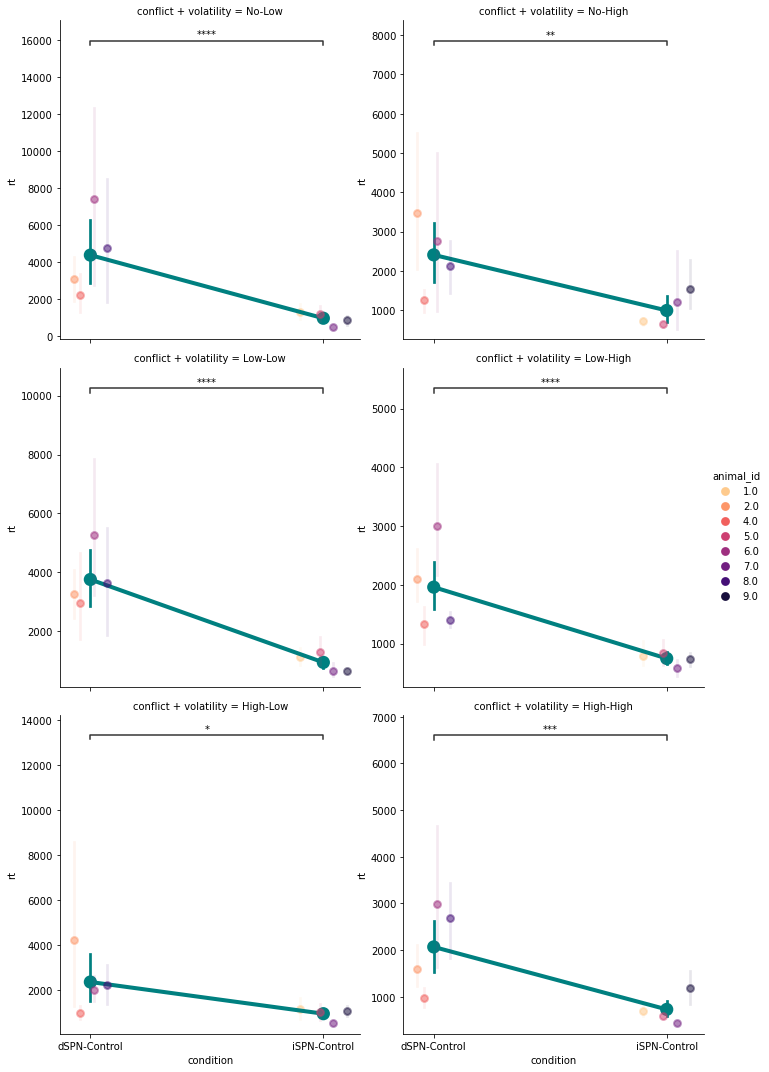

In [187]:
g1 = justplot("condition","rt",mean_animal_cp_rt.loc[mean_animal_cp_rt["condition"].str.contains("Control")],col_order,"cp","conflict + volatility","animal_id",False)
g1.savefig(fig_target_dir+"rt_comparison_dSPN_iSPN_controls_cp.png")

[('dSPN-Control', 'iSPN-Control')]
No Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

iSPN-Control v.s. dSPN-Control: t-test independent samples with Bonferroni correction, P_val=1.146e-02 stat=-2.634e+00
No High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

iSPN-Control v.s. dSPN-Control: t-test independent samples with Bonferroni correction, P_val=2.532e-05 stat=-4.760e+00
Low Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

iSPN-Control v.s. dSPN-Control: t-test independent samples with Bonferroni correction, P_val=9.462e-05 stat=-4.277e+00
Low High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02


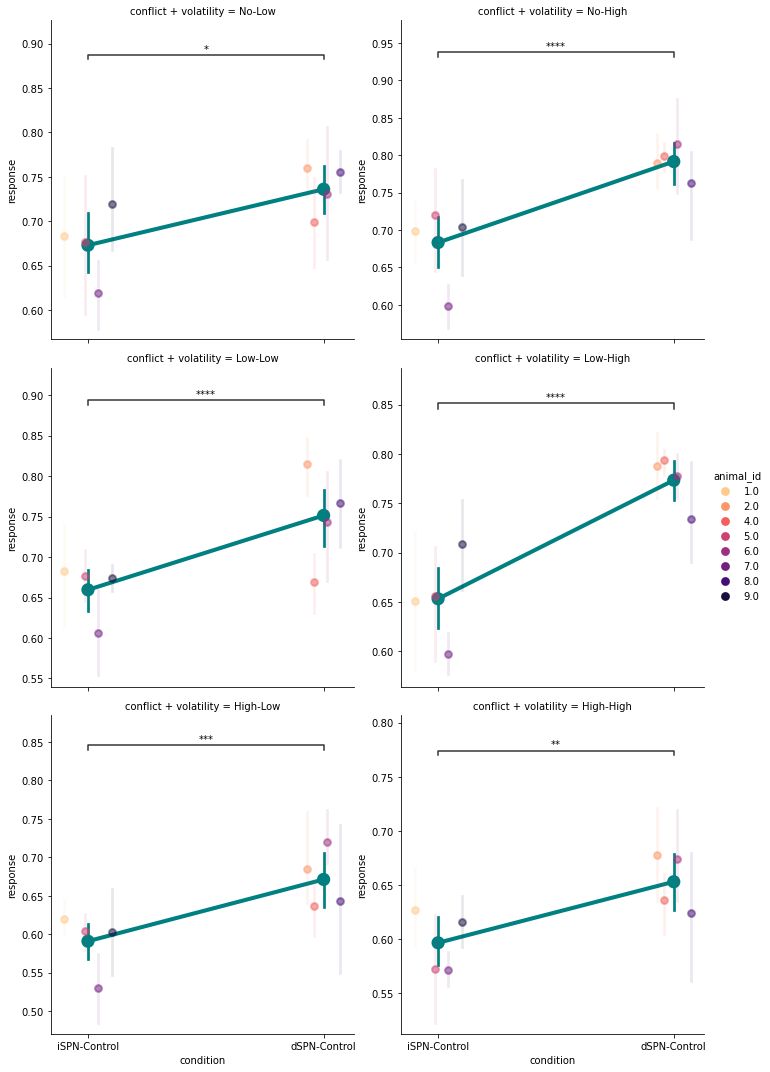

In [151]:
g1 = justplot("condition","response",mean_animal_avg_perf.loc[mean_animal_avg_perf["condition"].str.contains("Control")],col_order,"avg","conflict + volatility","animal_id",False)
g1.savefig(fig_target_dir+"performance_comparison_dSPN_iSPN_controls.png")

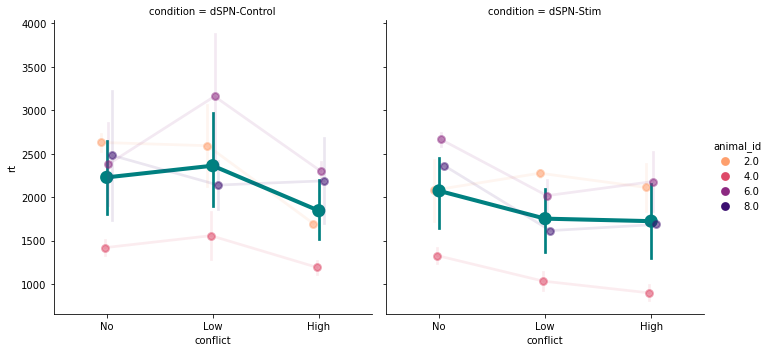

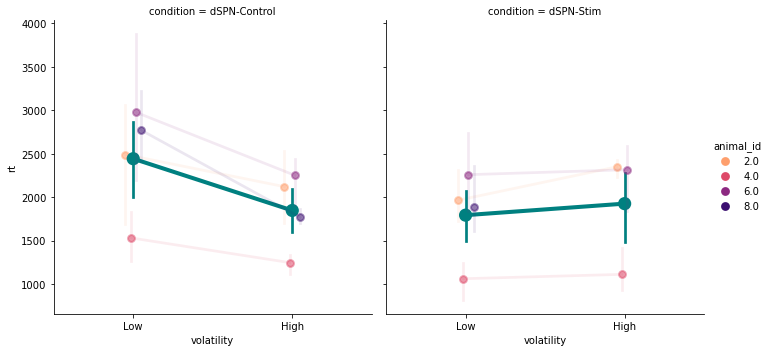

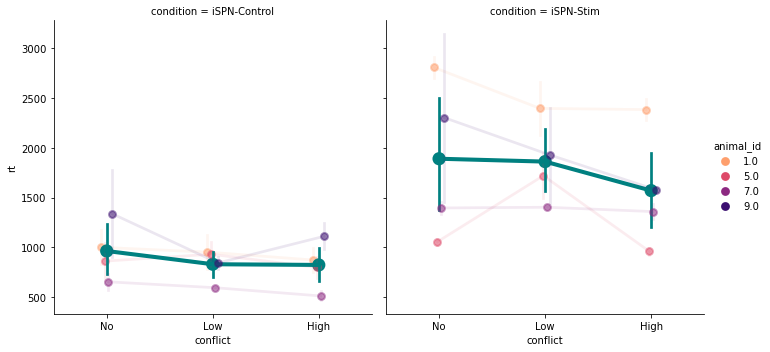

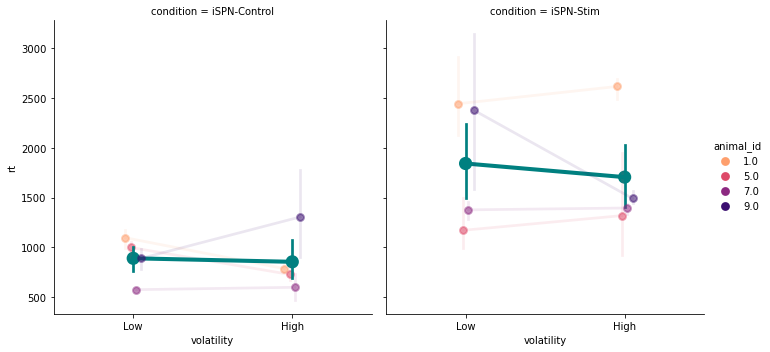

In [14]:
# pointplots("rt",mean_animal_avg_rt,"avg")

No Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=3.852e-02 stat=2.150e+00
No High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=2.200e-01 stat=-1.252e+00
Low Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=8.251e-03 stat=2.801e+00
Low High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p

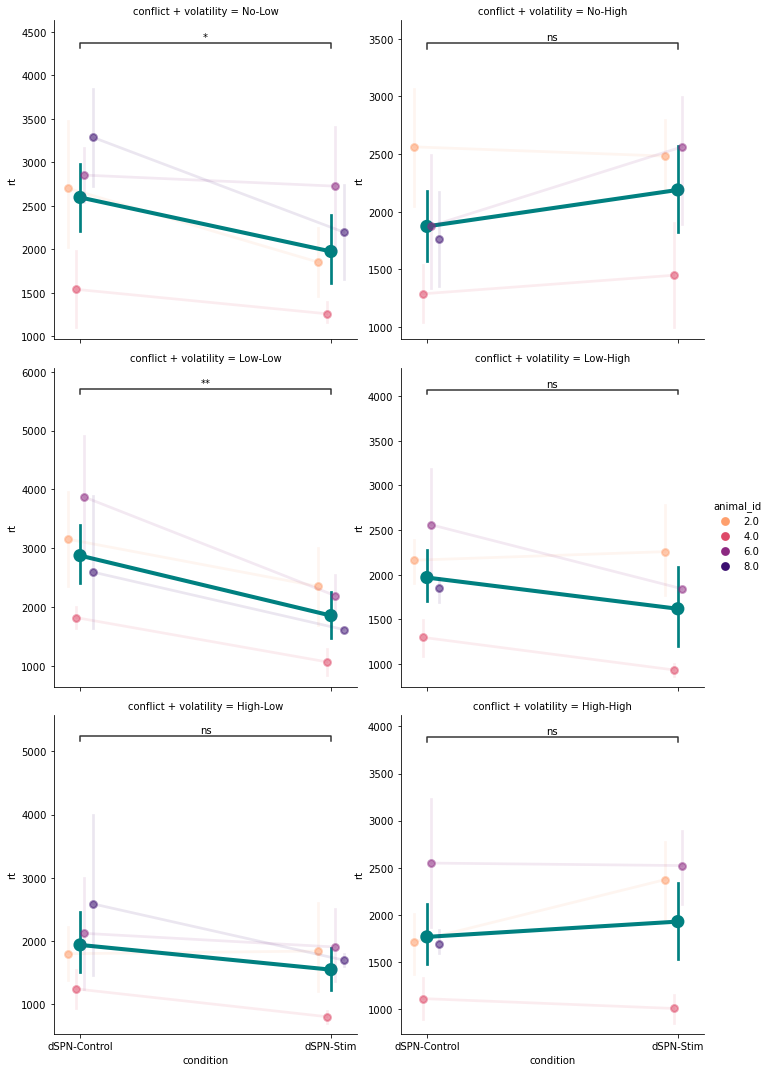

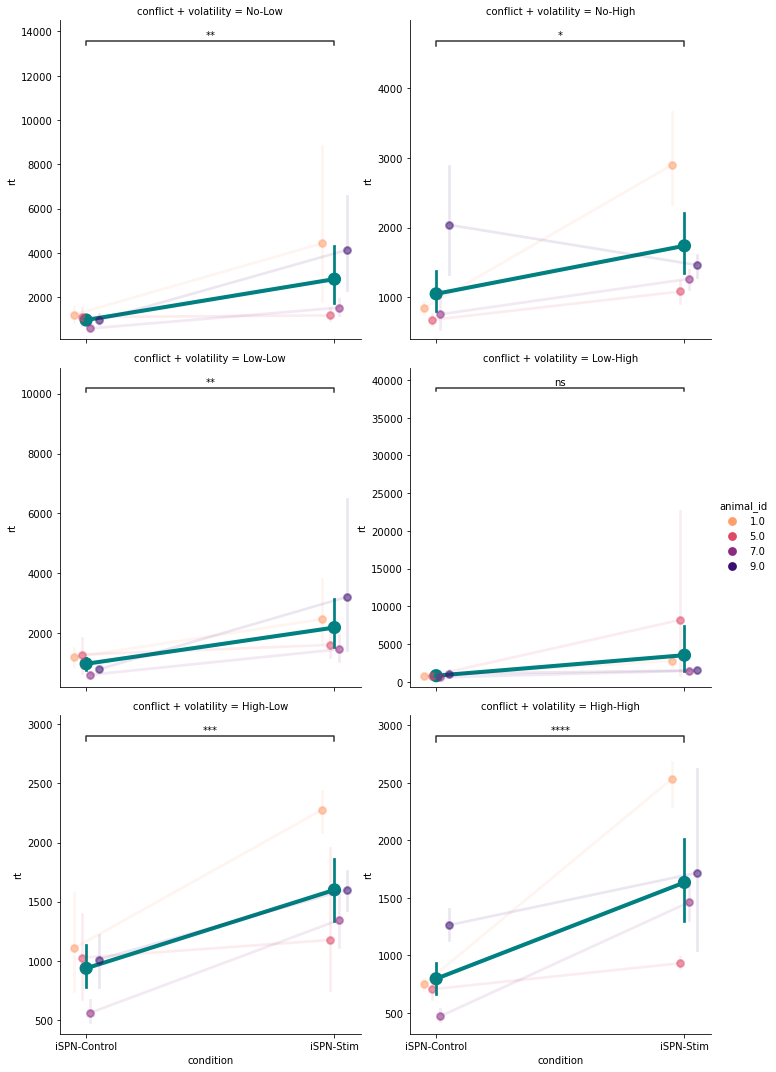

In [116]:
pointplots_full("condition","rt",mean_animal_avg_rt,"avg","conflict + volatility","animal_id",False)

No Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=2.149e-02 stat=2.407e+00
No High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=8.470e-01 stat=1.946e-01
Low Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=2.256e-02 stat=2.386e+00
Low High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p 

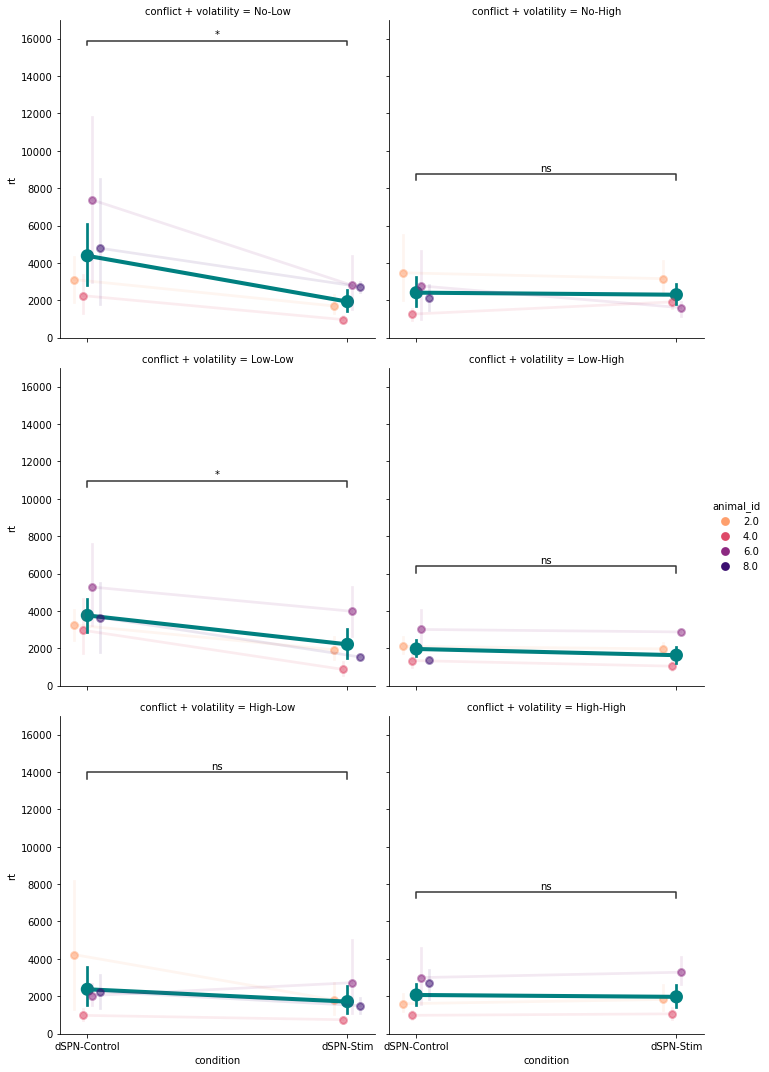

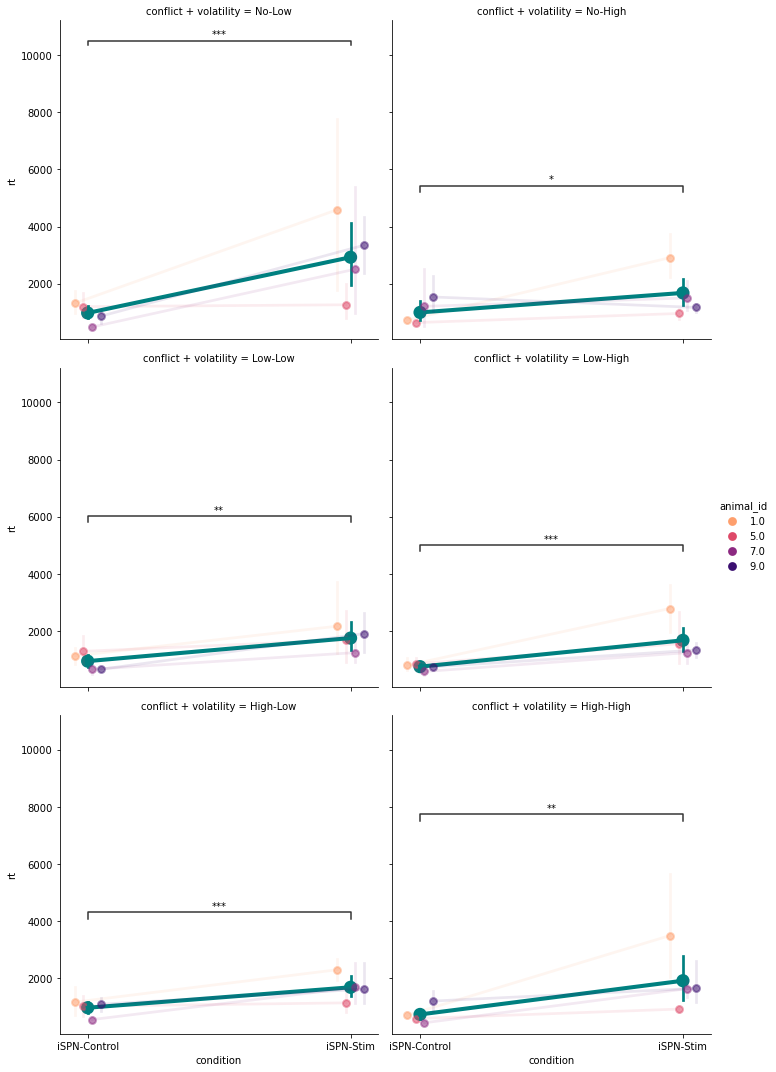

In [117]:
pointplots_full("condition","rt",mean_animal_cp_rt,"cp")

No Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=1.144e-01 stat=-1.619e+00
No High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=5.738e-01 stat=5.685e-01
Low Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=3.809e-01 stat=-8.875e-01
Low High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < 

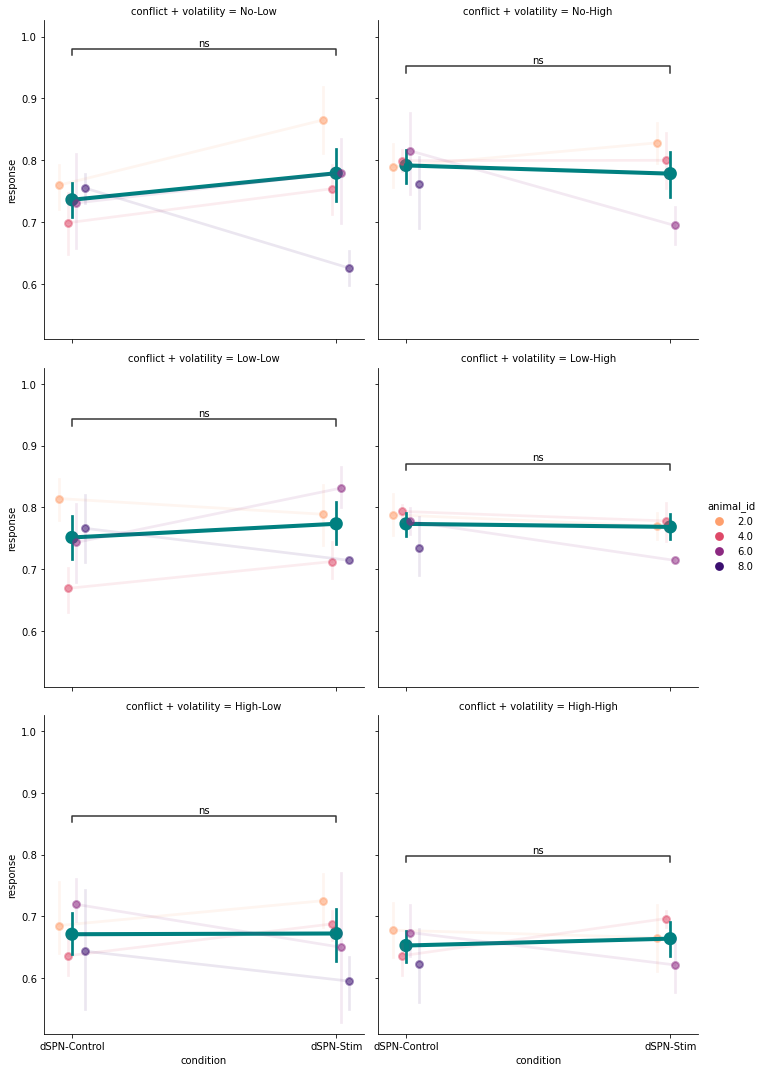

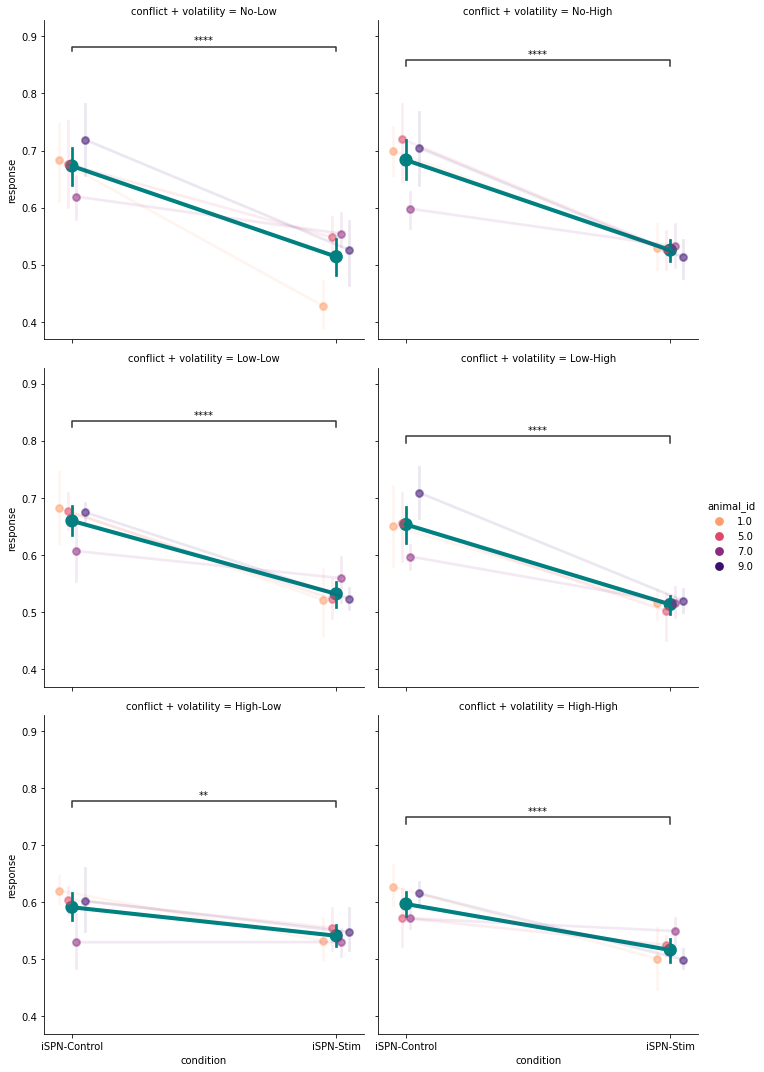

In [119]:
pointplots_full("condition","response",mean_animal_avg_perf,"avg")

No Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=8.818e-02 stat=-1.754e+00
No High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=5.564e-01 stat=-5.947e-01
Low Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=8.655e-01 stat=1.706e-01
Low High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < 

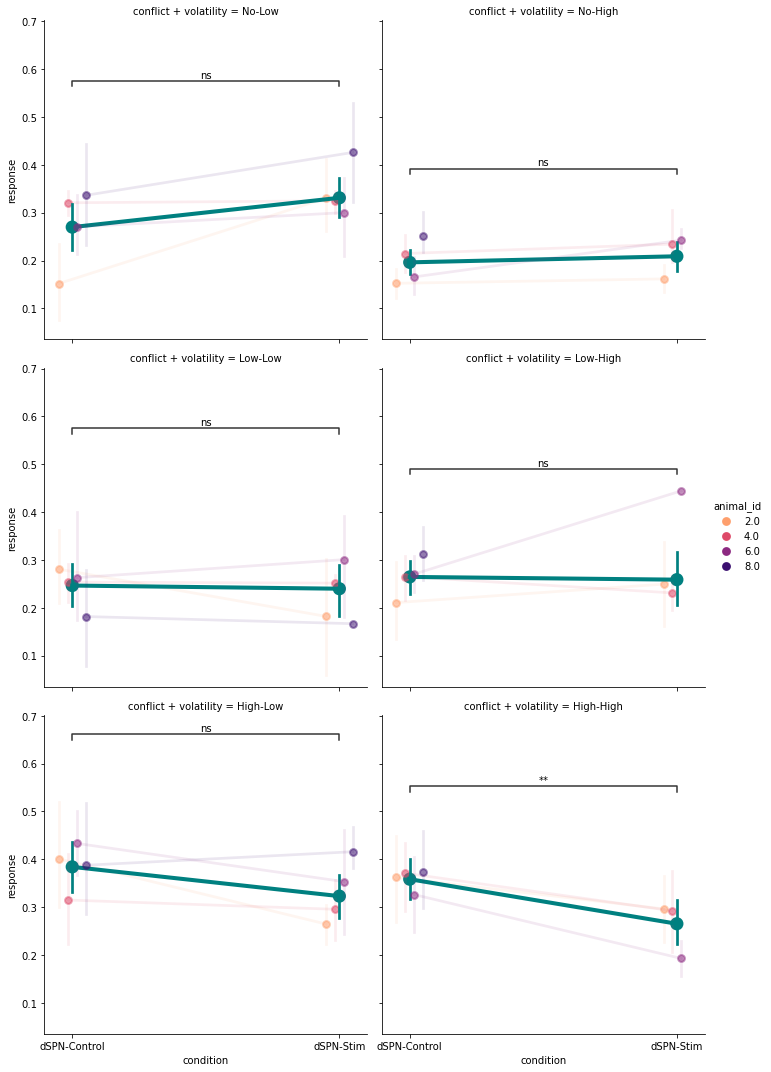

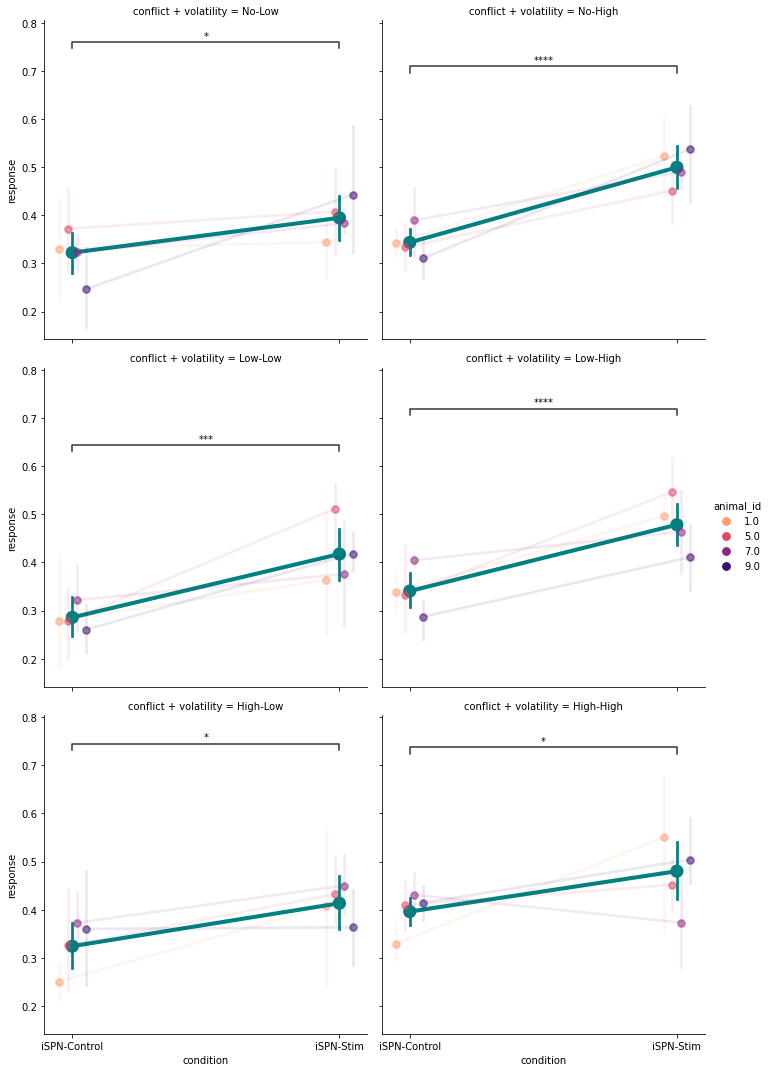

In [118]:
pointplots_full("condition","response",mean_animal_cp_perf,"cp")

No Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=2.094e-01 stat=1.279e+00
No High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=6.257e-01 stat=4.928e-01
Low Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=4.418e-01 stat=7.780e-01
Low High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p 

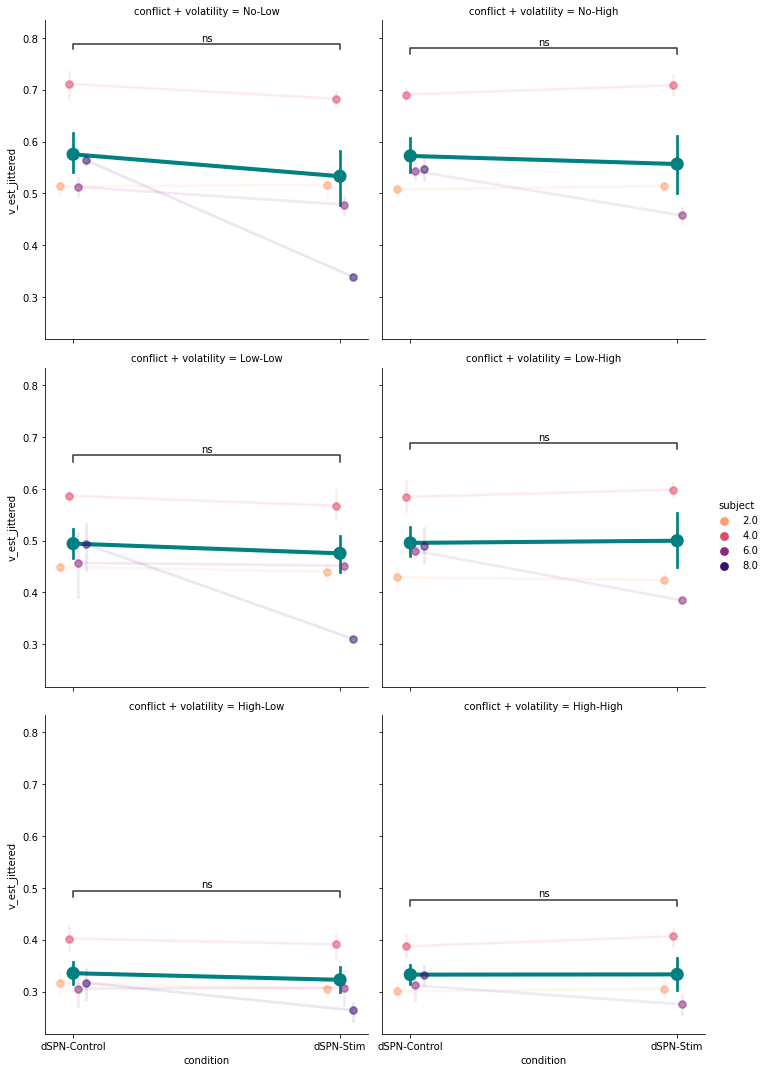

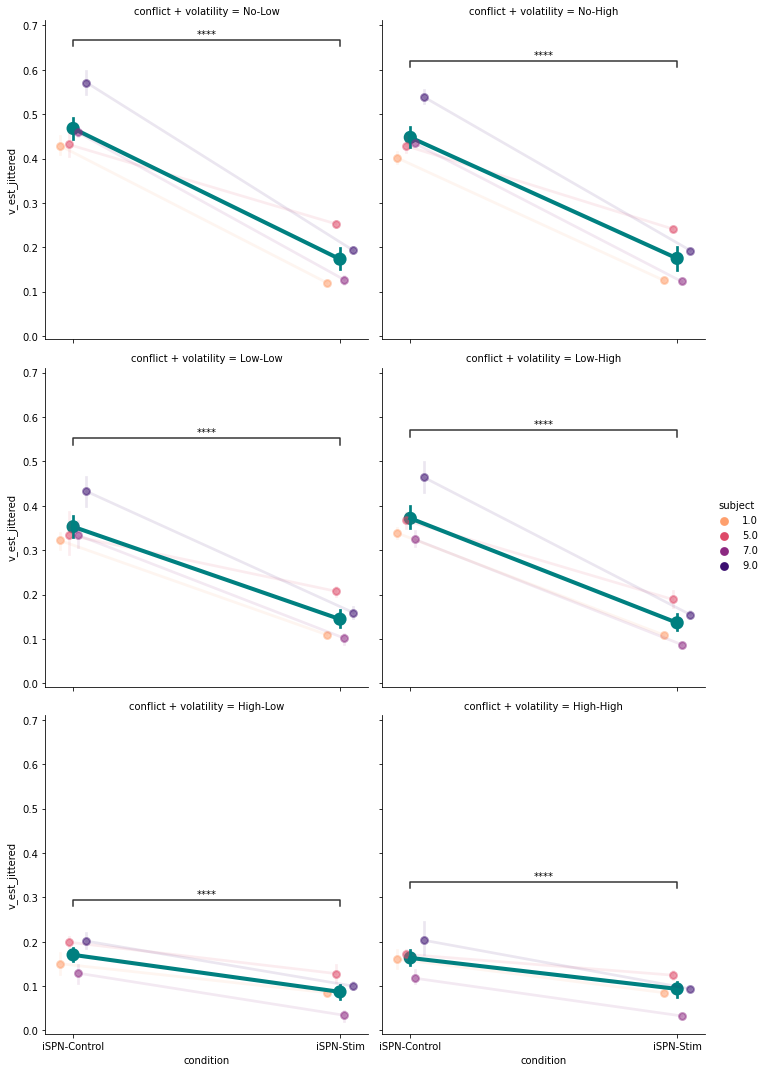

In [120]:
pointplots_full("condition","v_est_jittered",mean_animal_avg_v,"avg","conflict + volatility","subject")

No Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=8.702e-01 stat=-1.646e-01
No High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=6.369e-01 stat=-4.768e-01
Low Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=9.589e-01 stat=5.187e-02
Low High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < 

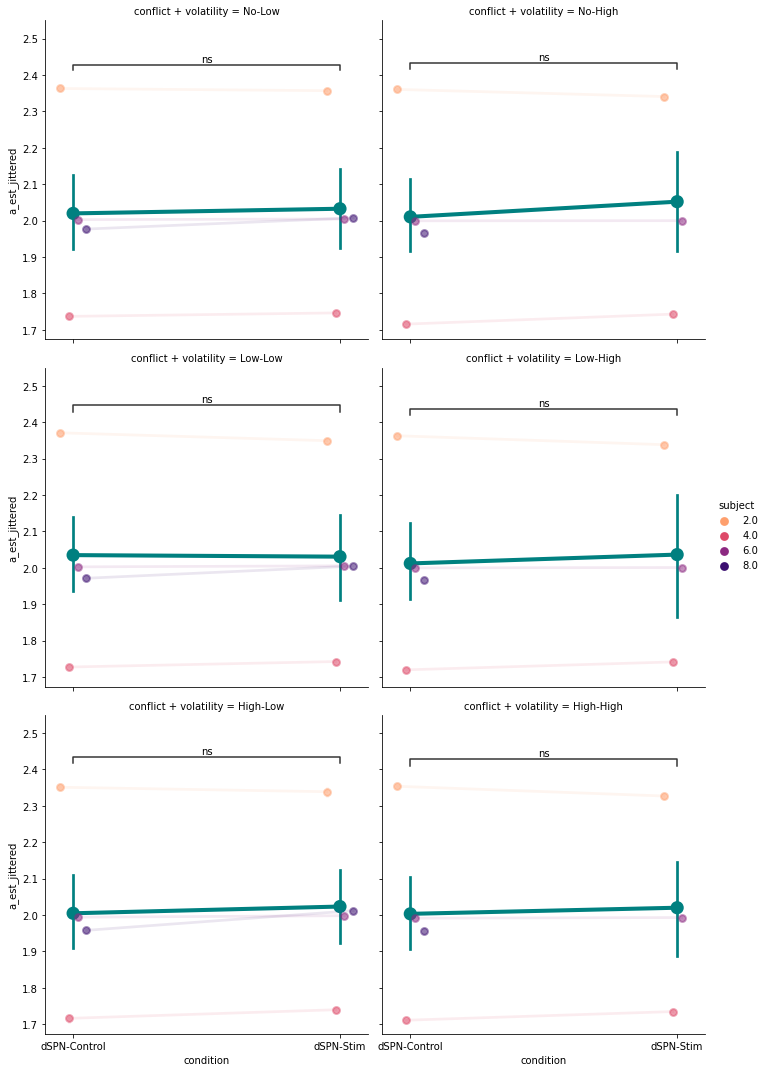

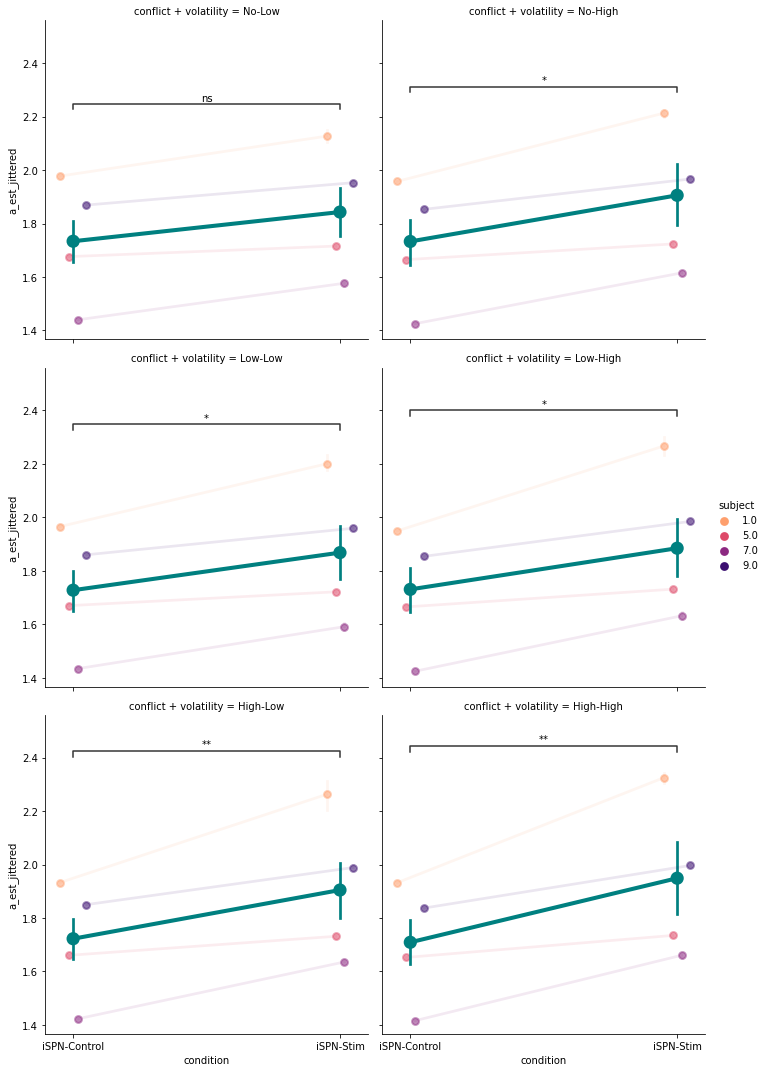

In [121]:
pointplots_full("condition","a_est_jittered",mean_animal_avg_a,"avg","conflict + volatility","subject")

No Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=8.489e-03 stat=-2.789e+00
No High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=2.481e-01 stat=-1.177e+00
Low Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=9.657e-03 stat=-2.738e+00
Low High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 <

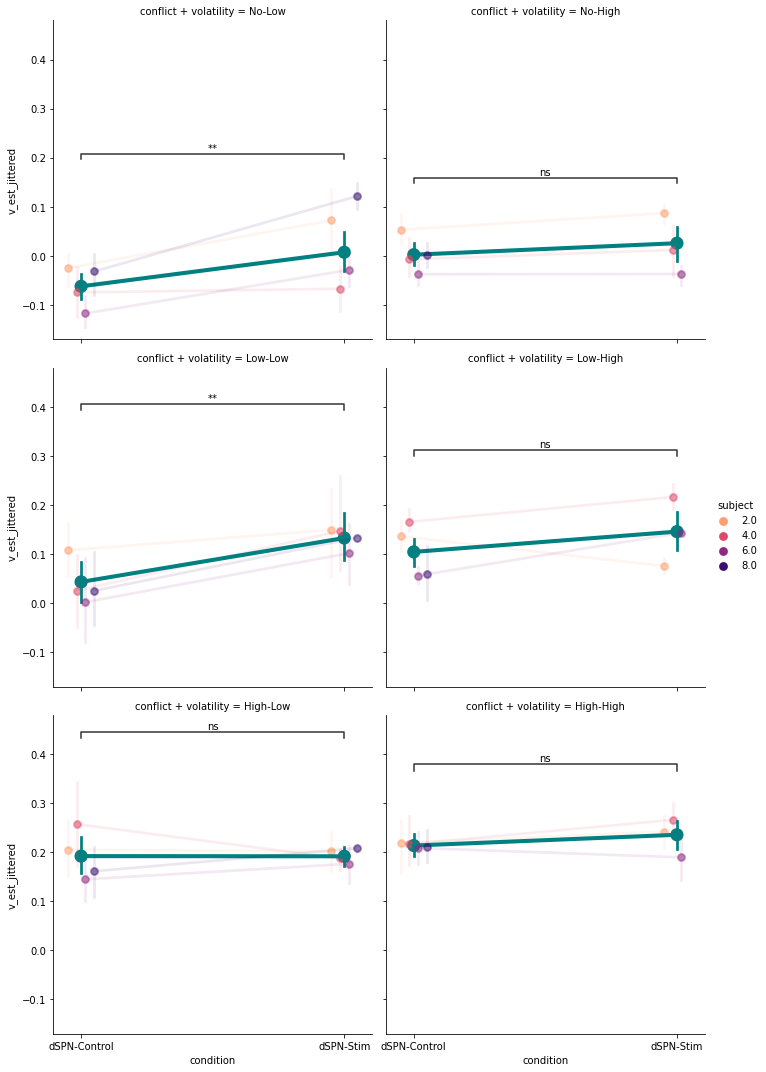

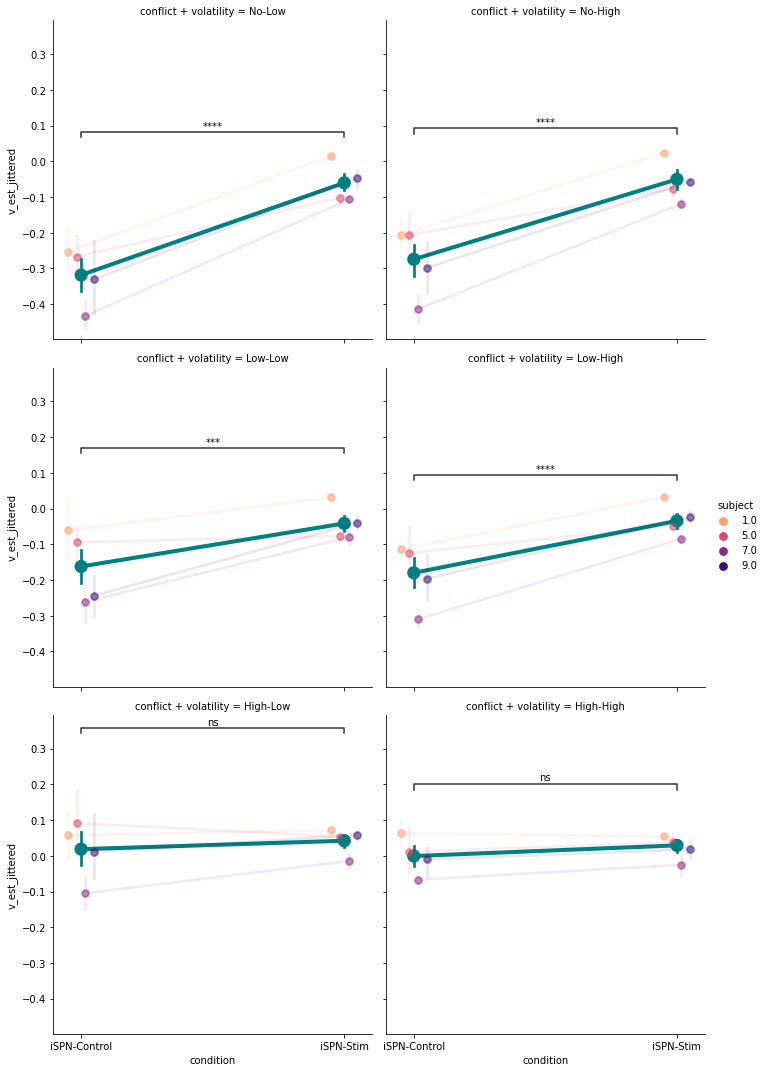

In [122]:
pointplots_full("condition","v_est_jittered",mean_animal_cp_v,"cp","conflict + volatility","subject")

No Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=6.221e-01 stat=-4.972e-01
No High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=6.716e-01 stat=-4.280e-01
Low Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

dSPN-Control v.s. dSPN-Stim: t-test independent samples with Bonferroni correction, P_val=8.952e-01 stat=-1.328e-01
Low High
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 <

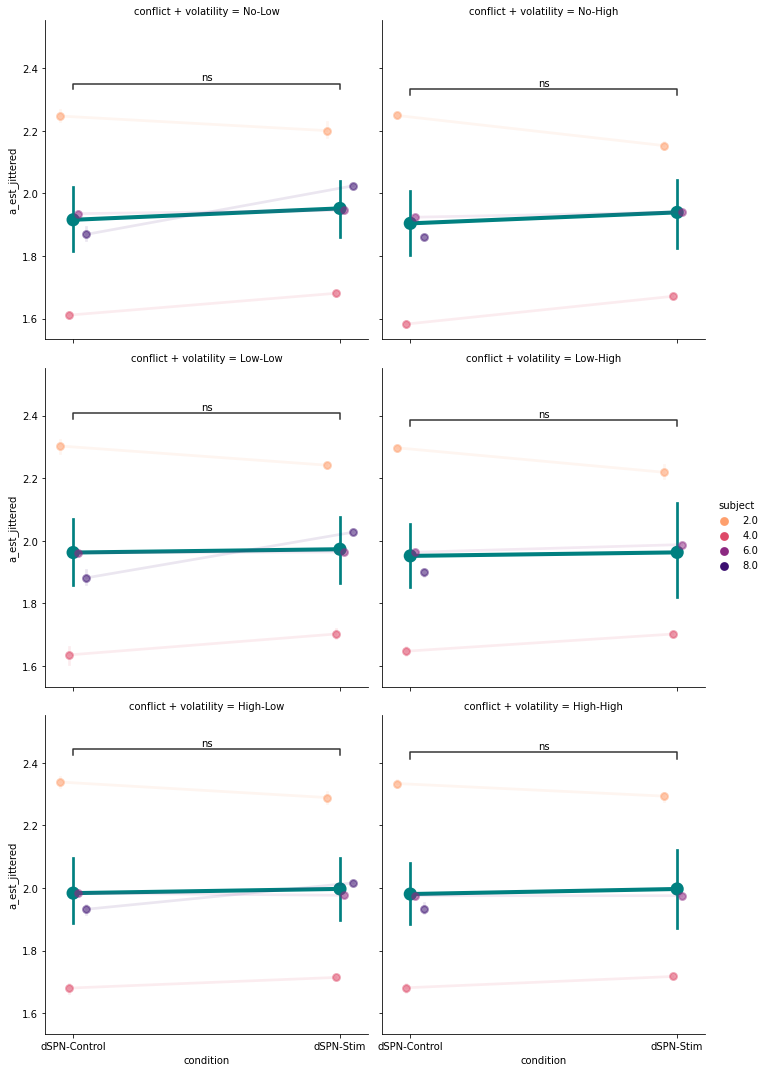

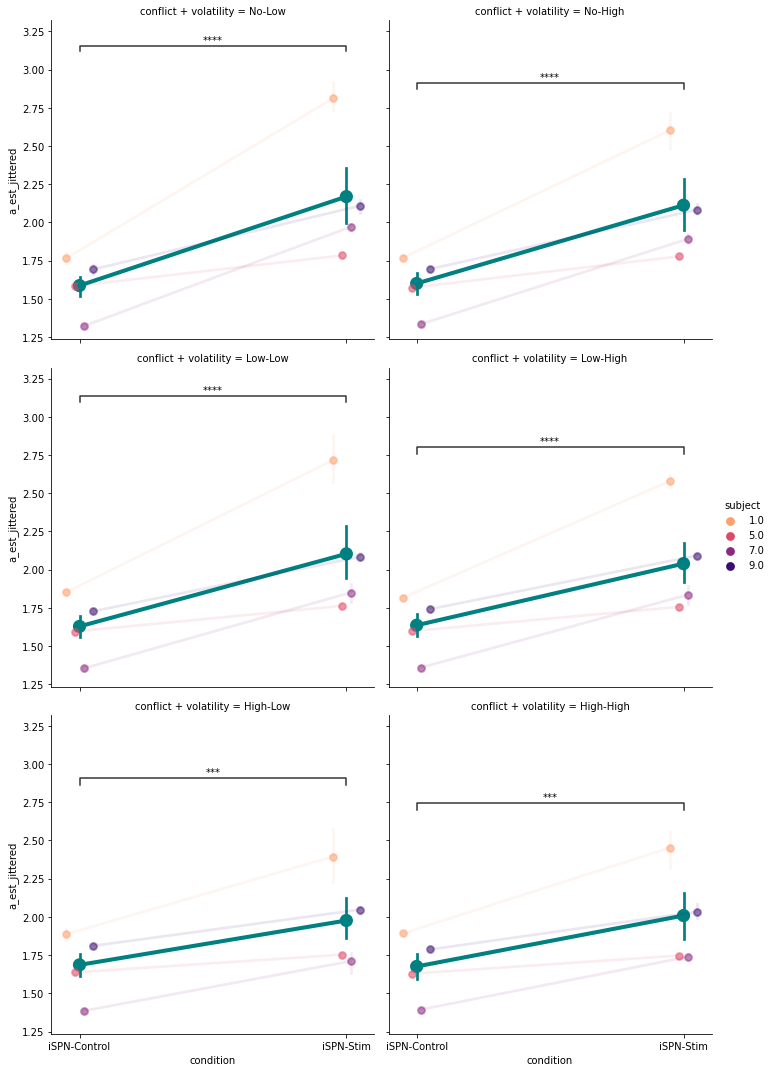

In [123]:
pointplots_full("condition","a_est_jittered",mean_animal_cp_a,"cp","conflict + volatility","subject")

[(0, 1)]
No Low
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04



IndexError: invalid index to scalar variable.

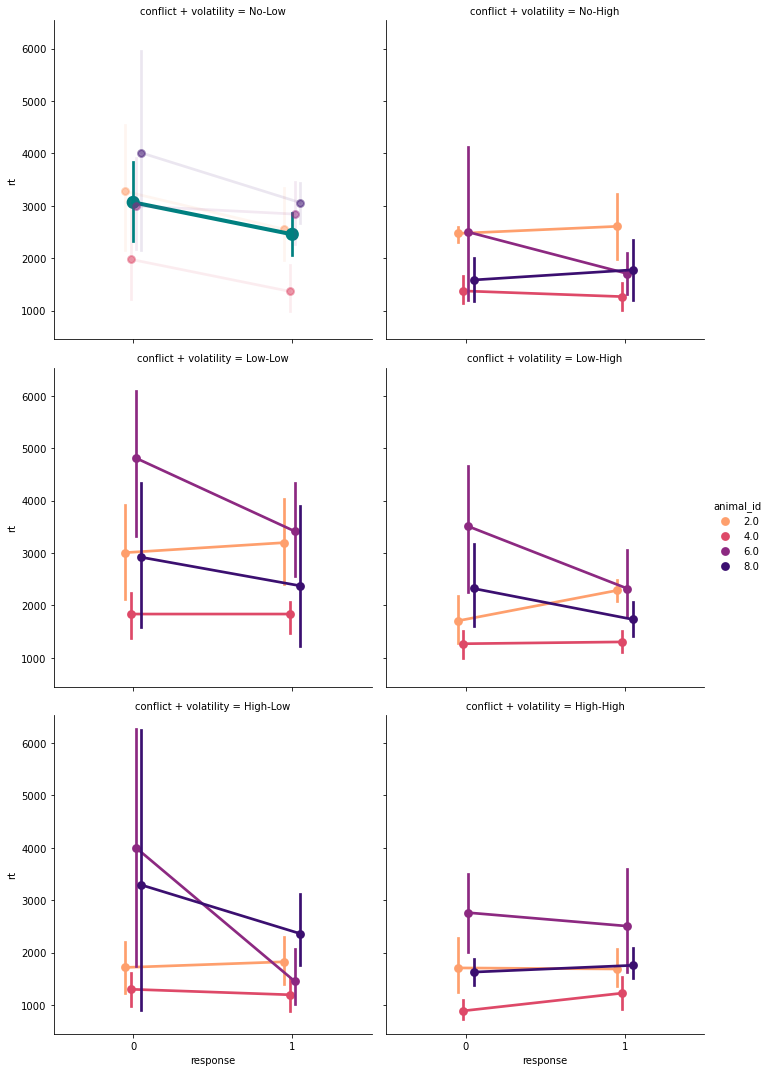

In [126]:
pointplots_full("response","rt",mean_animal_avg_rt_err.loc[mean_animal_avg_rt_err["condition"].str.contains("Control")],"avg","conflict + volatility","animal_id")

No Low
No High
Low Low
Low High
High Low
High High
No Low
No High
Low Low
Low High
High Low
High High


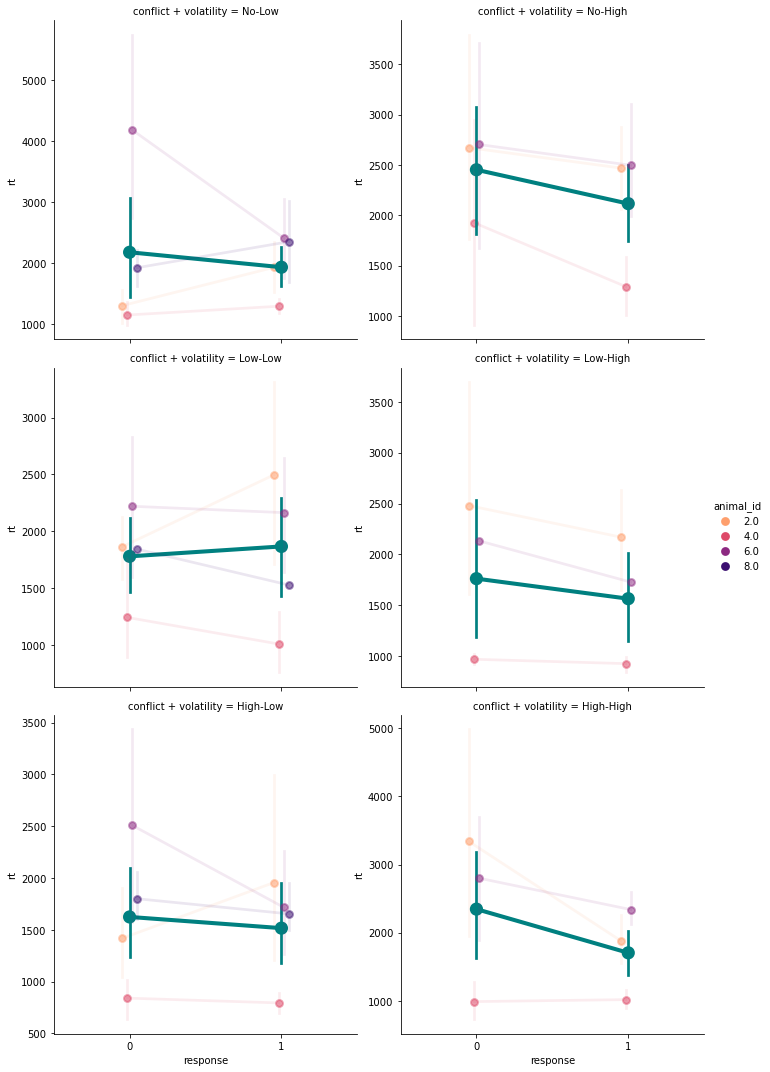

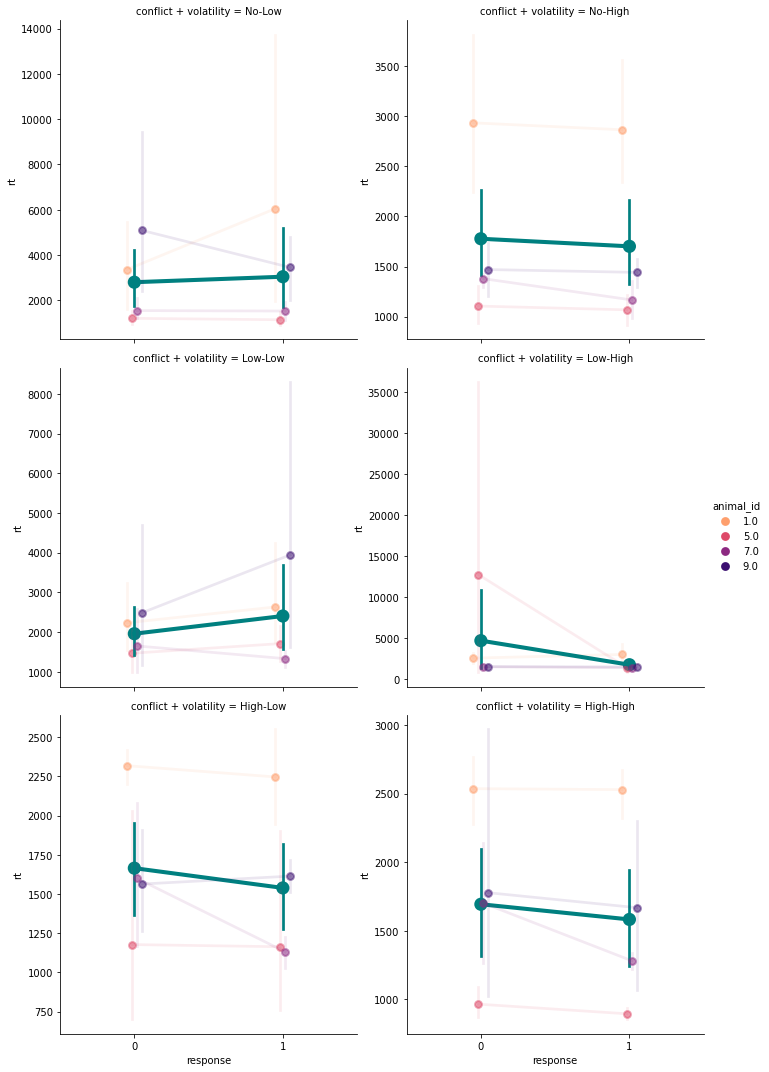

In [89]:
pointplots_full("response","rt",mean_animal_avg_rt_err.loc[mean_animal_avg_rt_err["condition"].str.contains("Stim")],"avg","conflict + volatility","animal_id",False)

No Low
No High
Low Low
Low High
High Low
High High
No Low
No High
Low Low
Low High
High Low
High High


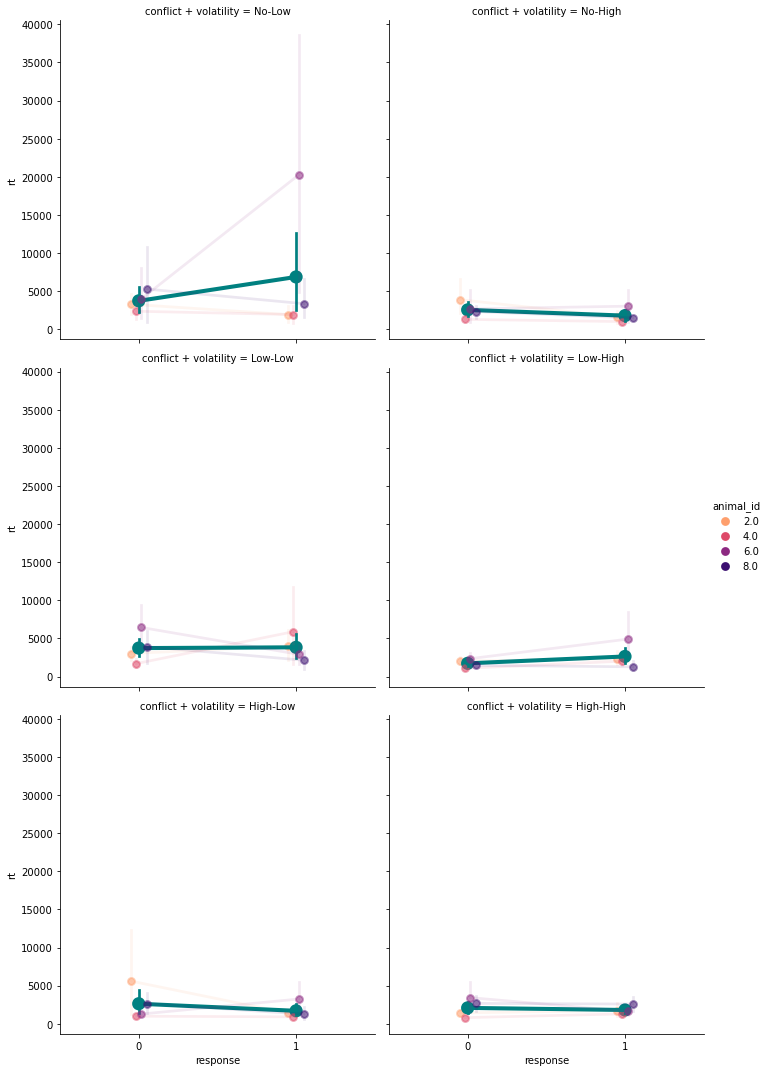

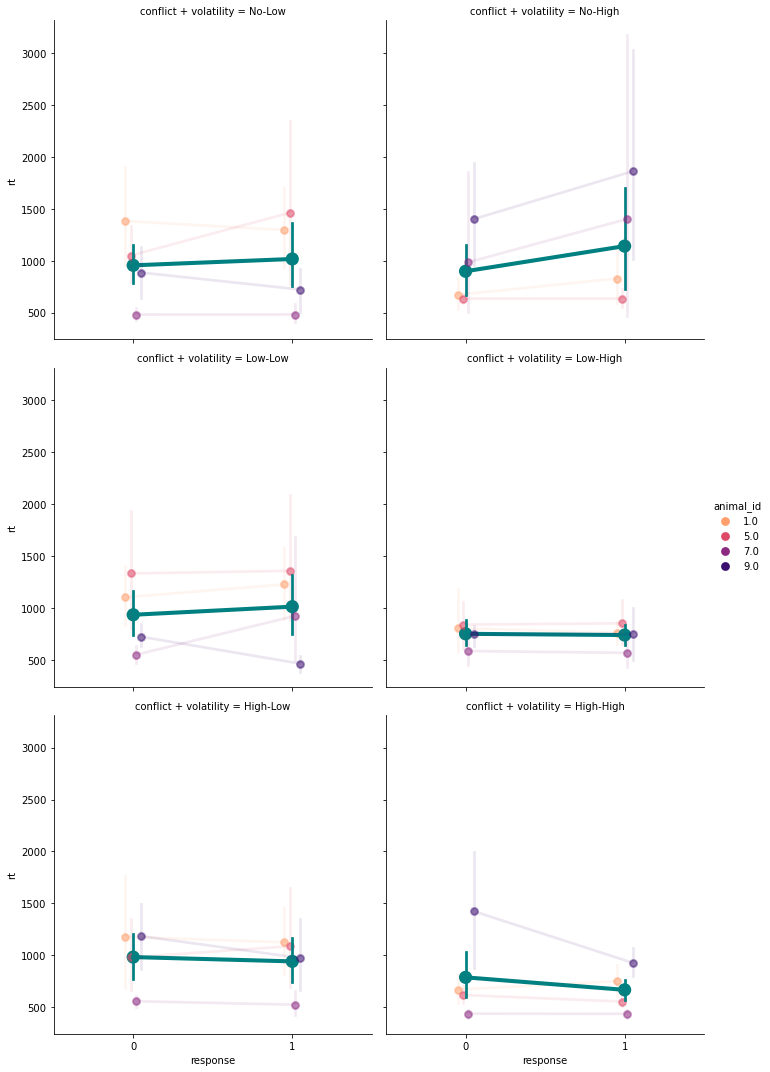

In [90]:
pointplots_full("response","rt",mean_animal_cp_rt_err.loc[mean_animal_cp_rt_err["condition"].str.contains("Control")],"cp","conflict + volatility","animal_id")

No Low
No High
Low Low
Low High
High Low
High High
No Low
No High
Low Low
Low High
High Low
High High


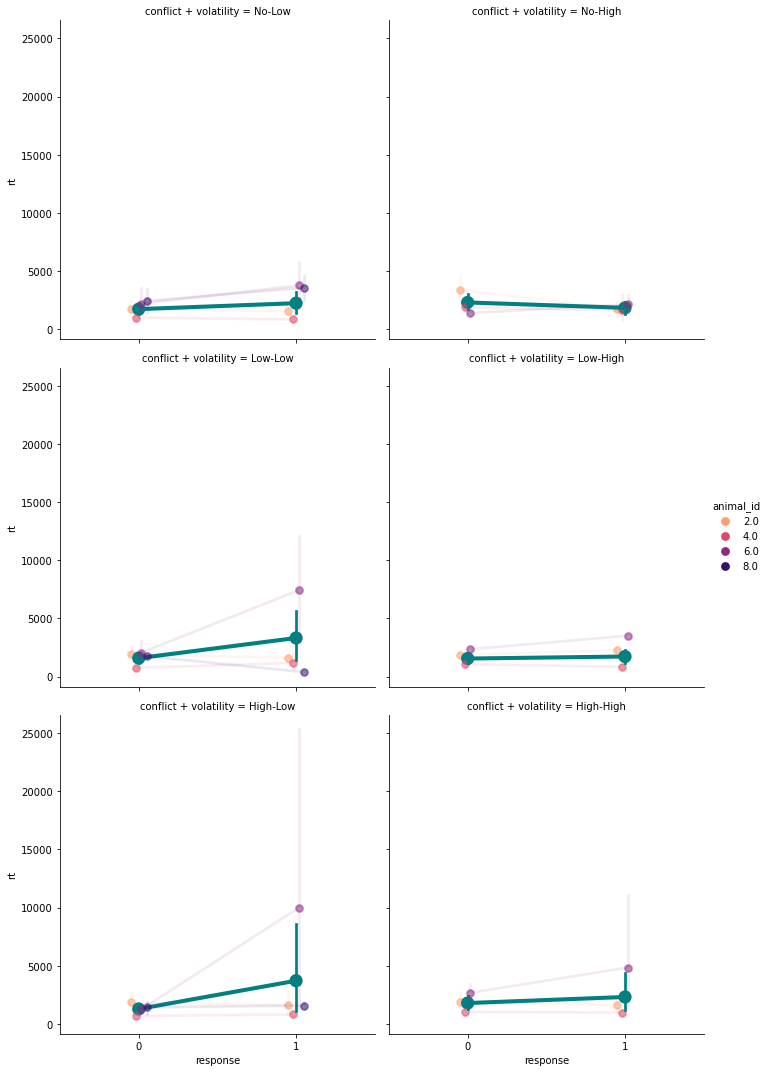

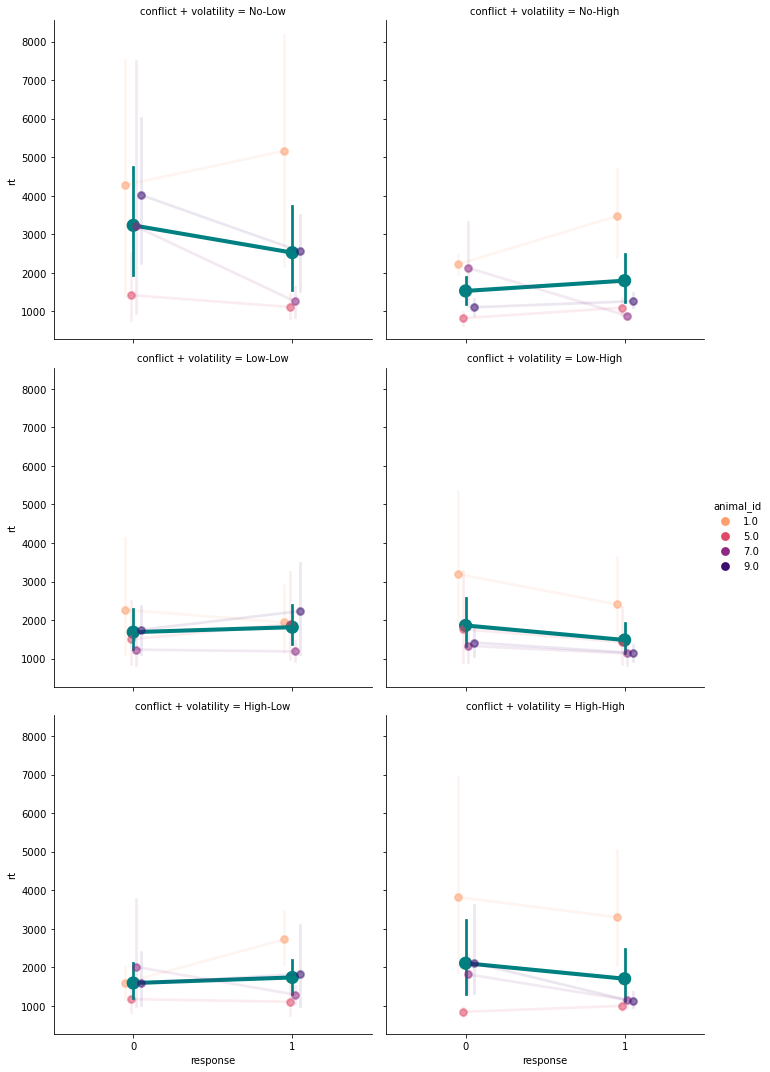

In [91]:
pointplots_full("response","rt",mean_animal_cp_rt_err.loc[mean_animal_cp_rt_err["condition"].str.contains("Stim")],"cp","conflict + volatility","animal_id")

In [202]:
compare_across_animals_wo10["v/a"] = compare_across_animals_wo10["v_est_jittered"].values/compare_across_animals_wo10["a_est_jittered"].values

/tmp/ipykernel_486816/3402787149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare_across_animals_wo10["v/a"] = compare_across_animals_wo10["v_est_jittered"].values/compare_across_animals_wo10["a_est_jittered"].values


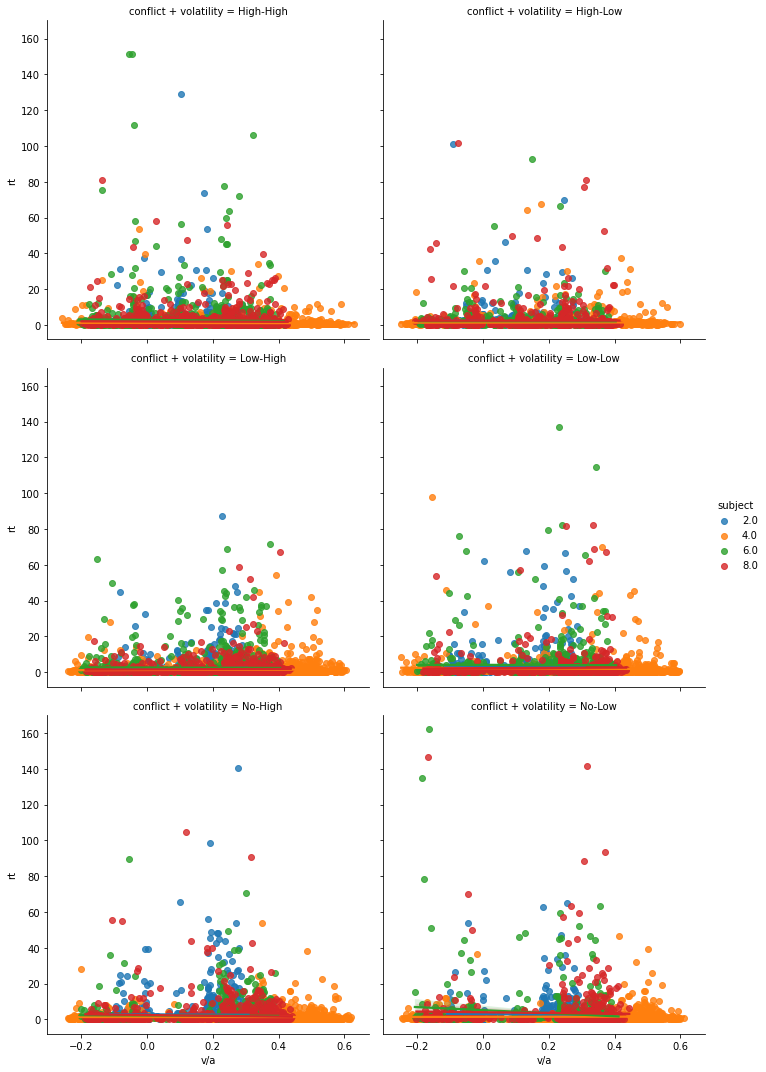

In [203]:
sns.lmplot(x="v/a",y="rt",col="conflict + volatility",hue="subject",data=compare_across_animals_wo10.loc[compare_across_animals_wo10["condition"]=="dSPN-Control"],col_wrap=2)

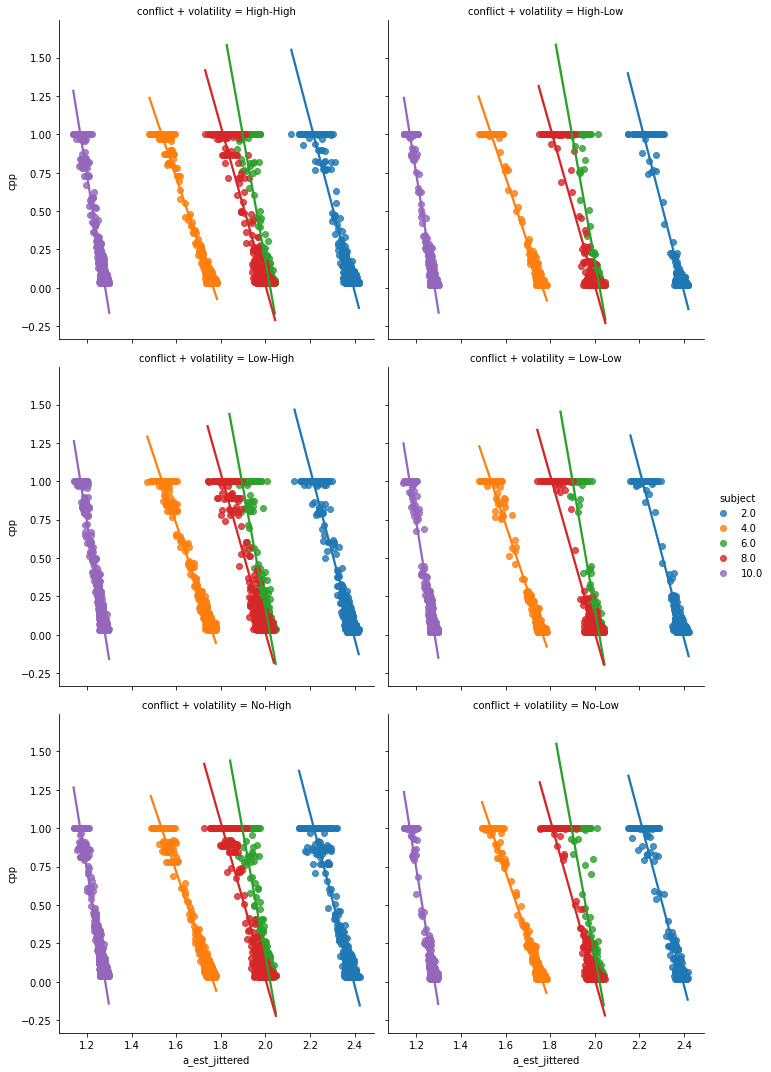

In [215]:
sns.lmplot(x="a_est_jittered",y="cpp",col="conflict + volatility",hue="subject",data=compare_across_animals.loc[(compare_across_animals["condition"]=="dSPN-Control")],col_wrap=2)

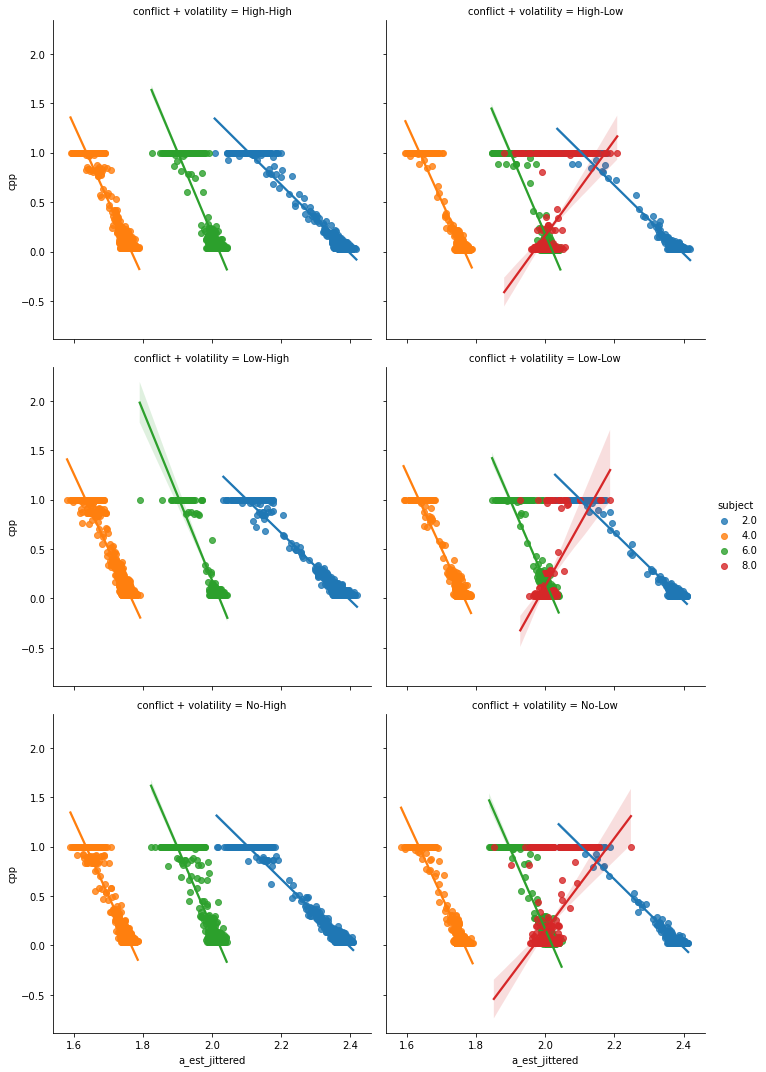

In [131]:
sns.lmplot(x="a_est_jittered",y="cpp",col="conflict + volatility",hue="subject",data=compare_across_animals.loc[(compare_across_animals["condition"]=="dSPN-Stim")&(compare_across_animals["subject"]!=10.0)],col_wrap=2)

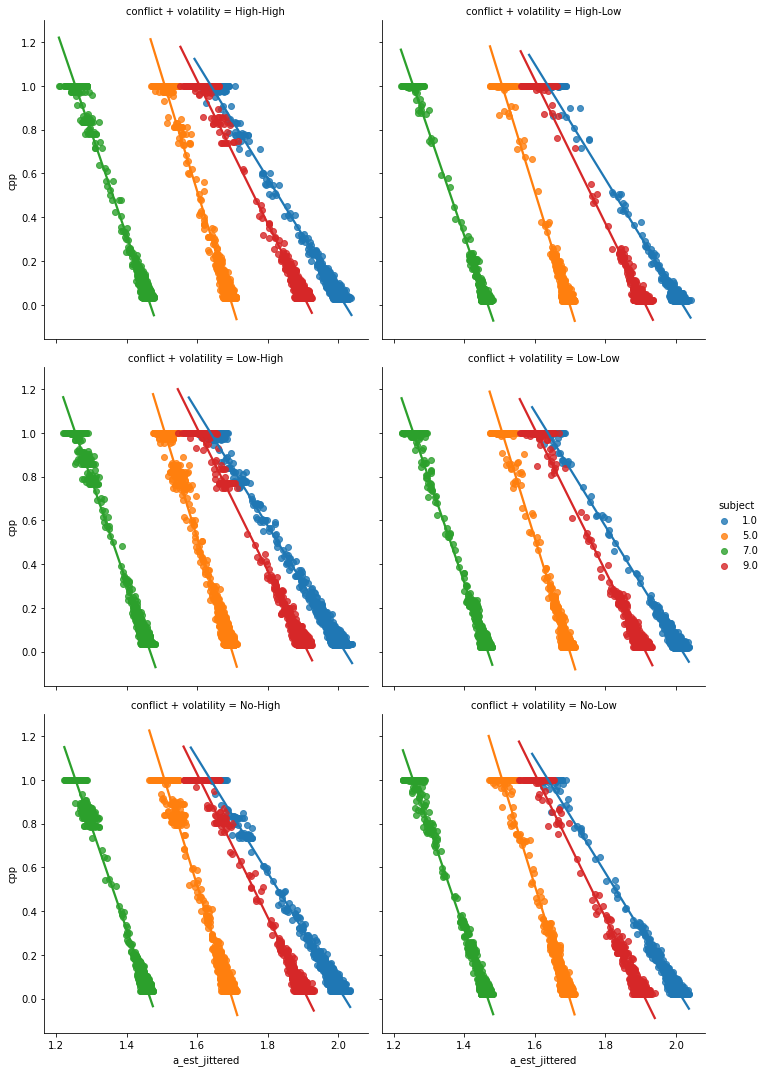

In [132]:
sns.lmplot(x="a_est_jittered",y="cpp",col="conflict + volatility",hue="subject",data=compare_across_animals.loc[compare_across_animals["condition"]=="iSPN-Control"],col_wrap=2)

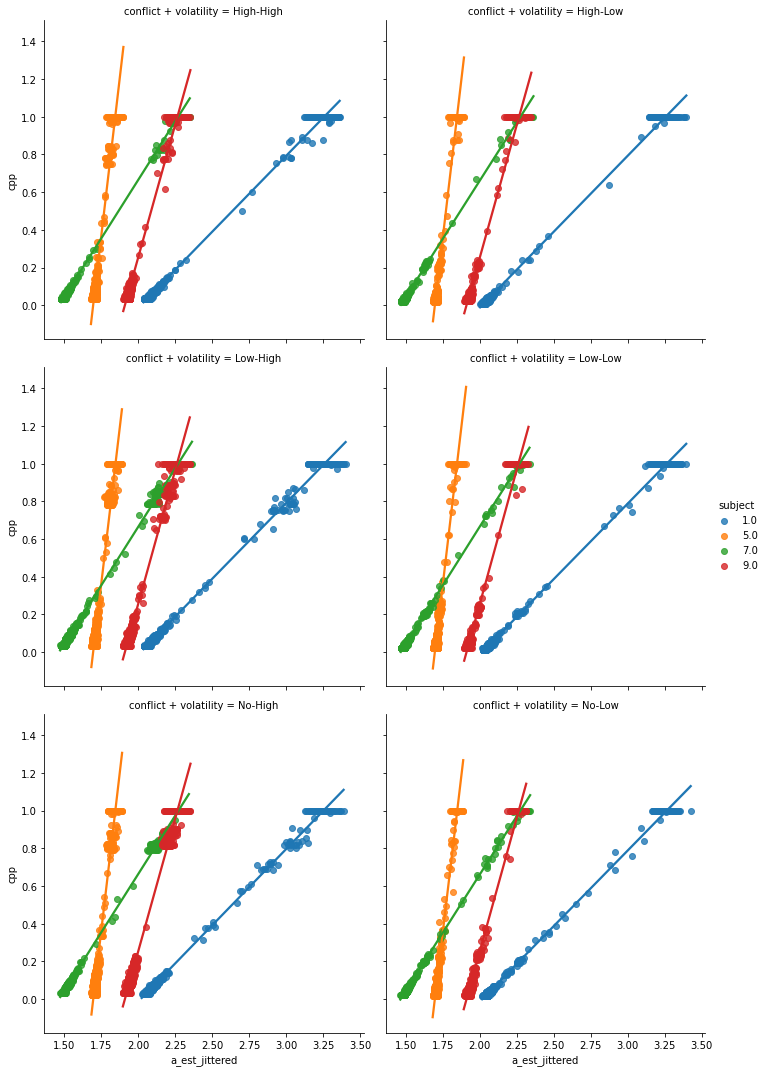

In [133]:
sns.lmplot(x="a_est_jittered",y="cpp",col="conflict + volatility",hue="subject",data=compare_across_animals.loc[compare_across_animals["condition"]=="iSPN-Stim"],col_wrap=2)

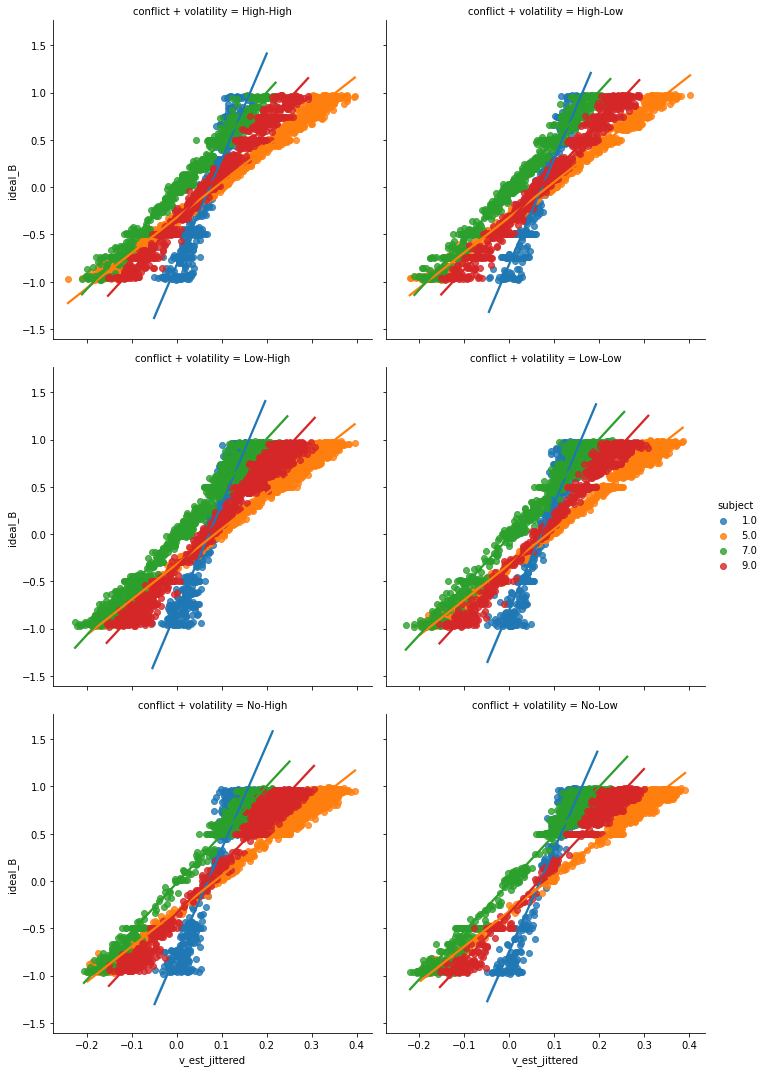

In [134]:
sns.lmplot(x="v_est_jittered",y="ideal_B",col="conflict + volatility",hue="subject",data=compare_across_animals.loc[compare_across_animals["condition"]=="iSPN-Stim"],col_wrap=2)

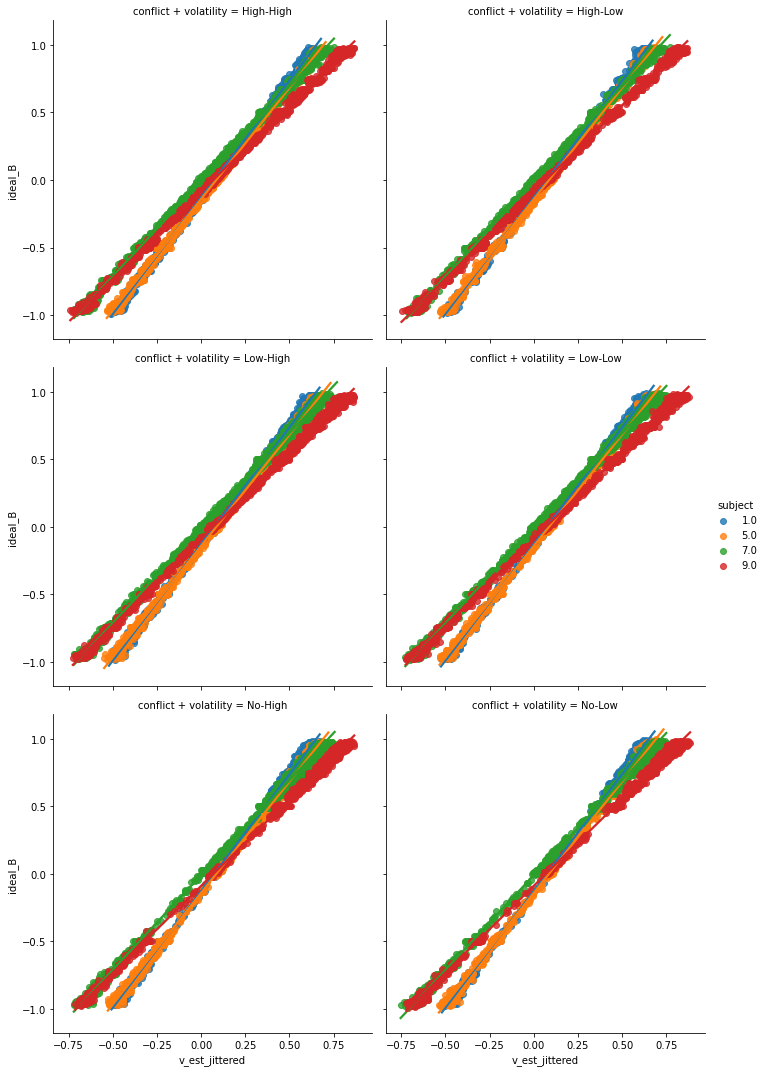

In [135]:
sns.lmplot(x="v_est_jittered",y="ideal_B",col="conflict + volatility",hue="subject",data=compare_across_animals.loc[compare_across_animals["condition"]=="iSPN-Control"],col_wrap=2)

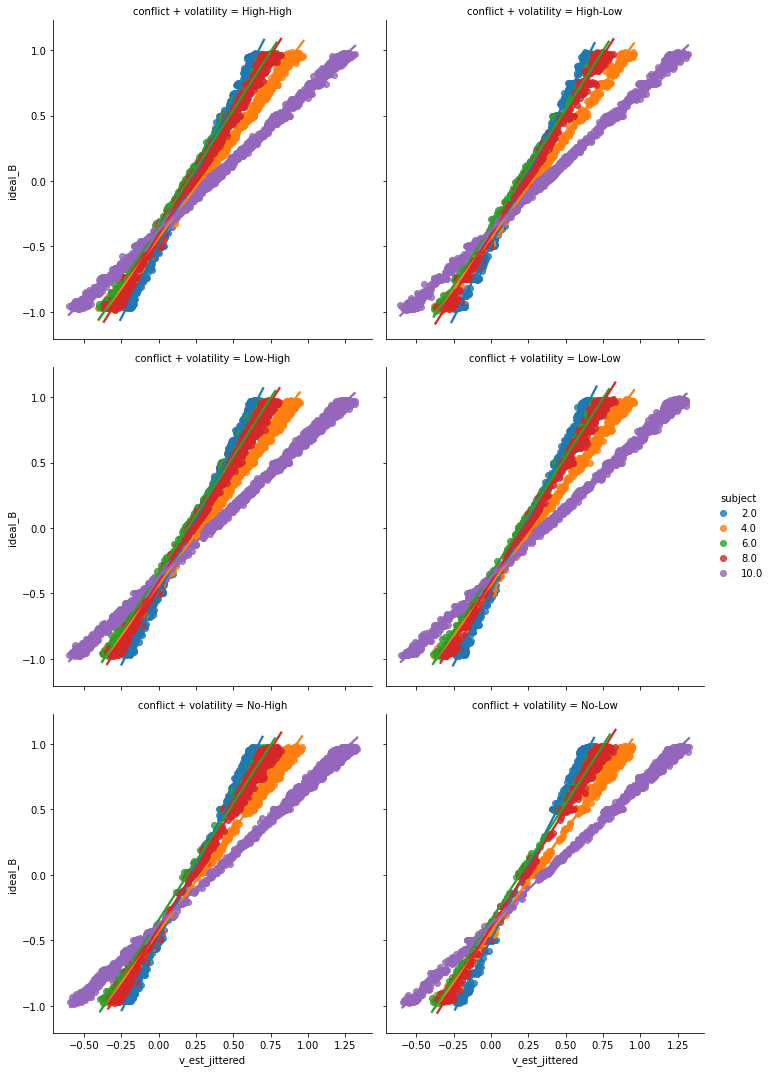

In [136]:
sns.lmplot(x="v_est_jittered",y="ideal_B",col="conflict + volatility",hue="subject",data=compare_across_animals.loc[compare_across_animals["condition"]=="dSPN-Control"],col_wrap=2)

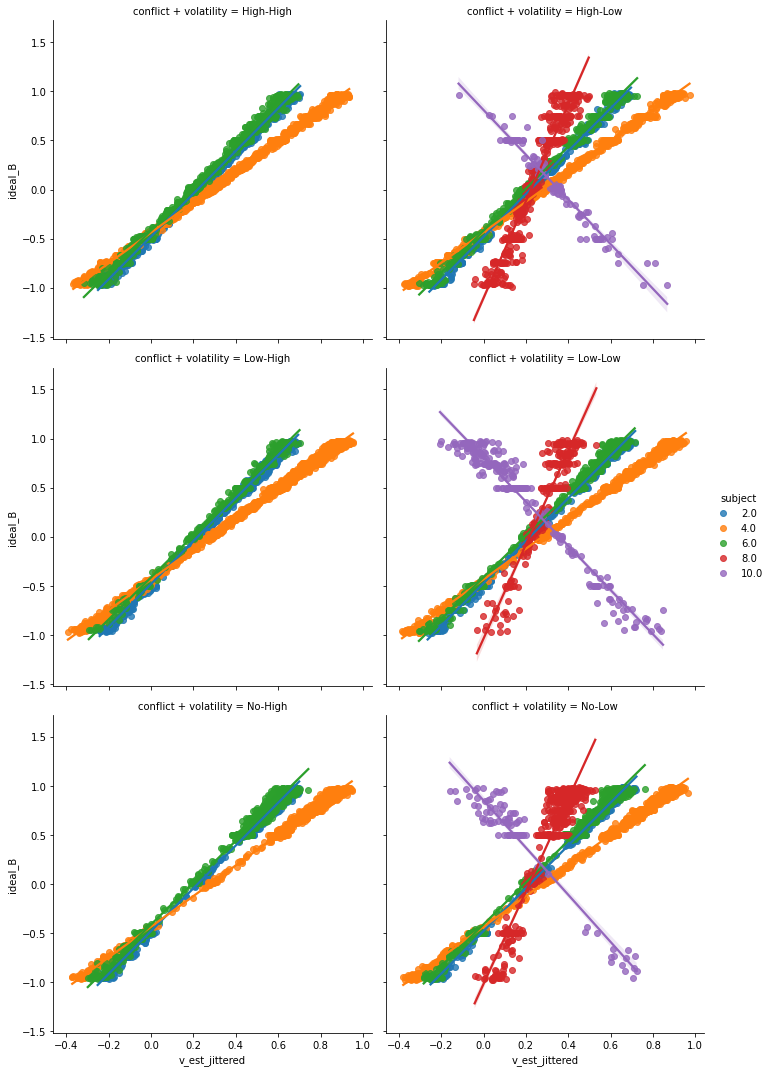

In [137]:
sns.lmplot(x="v_est_jittered",y="ideal_B",col="conflict + volatility",hue="subject",data=compare_across_animals.loc[compare_across_animals["condition"]=="dSPN-Stim"],col_wrap=2)

In [181]:

mean_animal_evol_rt

animal_id conflict volatility     condition  trials_from_change_point  \
0           1.0     High       High  iSPN-Control                      -2.0   
1           1.0     High       High  iSPN-Control                      -1.0   
2           1.0     High       High  iSPN-Control                       0.0   
3           1.0     High       High  iSPN-Control                       1.0   
4           1.0     High       High  iSPN-Control                       2.0   
...         ...      ...        ...           ...                       ...   
1111        9.0       No        Low     iSPN-Stim                       5.0   
1112        9.0       No        Low     iSPN-Stim                       6.0   
1113        9.0       No        Low     iSPN-Stim                       7.0   
1114        9.0       No        Low     iSPN-Stim                       8.0   
1115        9.0       No        Low     iSPN-Stim                       9.0   

               rt nuclei conflict + volatility  
0      759.387900   iSPN             High-High  
1      928.313167   iSPN             High-High  
2      706.526690   iSPN             High-High  
3      774.101449   iSPN             High-High  
4      737.496377   iSPN             High-High  
...           ...    ...                   ...  
1111  2689.470588   iSPN                No-Low  
1112  3051.661765   iSPN                No-Low  
1113  2978.147059   iSPN                No-Low  
1114  4737.073529   iSPN                No-Low  
1115  2577.588235   iSPN                No-Low  

[1116 rows x 8 columns]

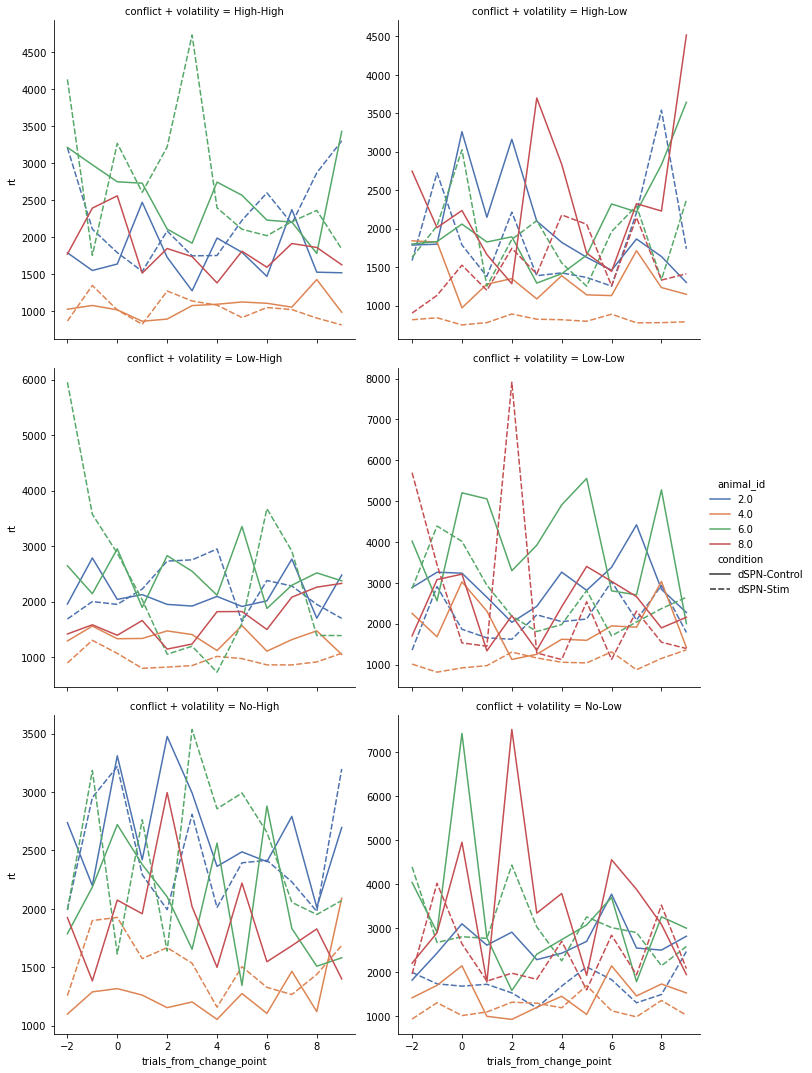

In [182]:
sns.relplot(x="trials_from_change_point",y="rt",hue="animal_id",col="conflict + volatility",style="condition",data=mean_animal_evol_rt.loc[mean_animal_evol_rt["nuclei"]=="dSPN"],kind='line',col_wrap=2,facet_kws={'sharey':False},palette='deep')

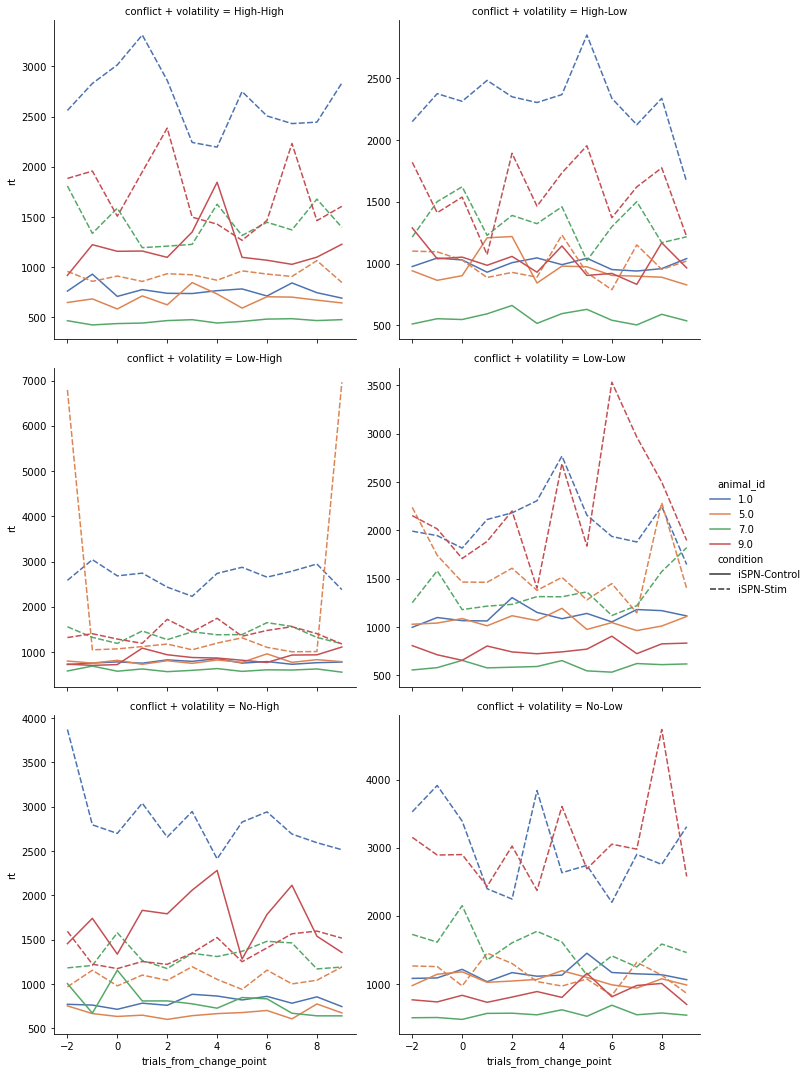

In [195]:
sns.relplot(x="trials_from_change_point",y="rt",hue="animal_id",col="conflict + volatility",style="condition",data=mean_animal_evol_rt.loc[mean_animal_evol_rt["nuclei"]=="iSPN"],kind='line',col_wrap=2,facet_kws={'sharey':False},palette='deep')